<a href="https://colab.research.google.com/github/hemachelli/Fmml2024/blob/main/Updated_Lab_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lab by Ganesh Chandan

kanakala.ganesh@research.iiit.ac.in

# Hierarchical Clustering

KMeans is an iterative process. It will keep on running until the centroids of newly formed clusters do not change or the maximum number of iterations are reached.

But there are certain challenges with K-means. It always tries to make clusters of the same size. Also, we have to decide the number of clusters at the beginning of the algorithm. Ideally, we would not know how many clusters should we have, in the beginning of the algorithm and hence it a challenge with K-means.

This is a gap hierarchical clustering bridges with aplomb. It takes away the problem of having to pre-define the number of clusters. Sounds like a dream! So, let’s see what hierarchical clustering is and how it improves on K-means.

## What is Hierarchical Clustering?

Let’s say we have the below points and we want to cluster them into groups:

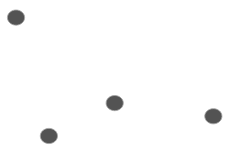

We can assign each of these points to a separate cluster:

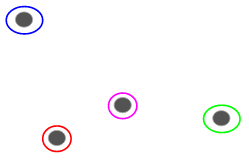

Now, based on the similarity of these clusters, we can combine the most similar clusters together and repeat this process until only a single cluster is left:

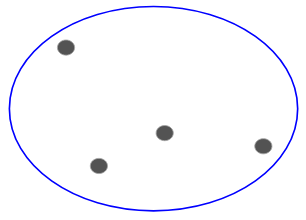

We are essentially building a hierarchy of clusters. That’s why this algorithm is called hierarchical clustering. I will discuss how to decide the number of clusters in a later section. For now, let’s look at the different types of hierarchical clustering.

## Agglomerative Hierarchical Clustering

In this technique, initially each data point is considered as an individual cluster. At each iteration, the similar clusters merge with other clusters until one cluster or K clusters are formed.

The basic algorithm of Agglomerative is straight forward.

    Compute the proximity matrix
    Let each data point be a cluster
    Repeat: Merge the two closest clusters and update the proximity matrix
    Until only a single cluster remains

To understand better let’s see a pictorial representation of the Agglomerative Hierarchical clustering Technique. Lets say we have six data points {A,B,C,D,E,F}.

    Step- 1: In the initial step, we calculate the proximity of individual points and consider all the six data points as individual clusters as shown in the image below.

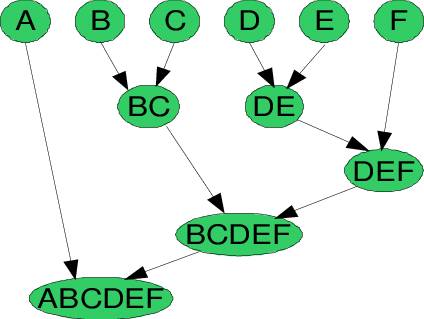

    Step- 2: In step two, similar clusters are merged together and formed as a single cluster. Let’s consider B,C, and D,E are similar clusters that are merged in step two. Now, we’re left with four clusters which are A, BC, DE, F.
    Step- 3: We again calculate the proximity of new clusters and merge the similar clusters to form new clusters A, BC, DEF.
    Step- 4: Calculate the proximity of the new clusters. The clusters DEF and BC are similar and merged together to form a new cluster. We’re now left with two clusters A, BCDEF.
    Step- 5: Finally, all the clusters are merged together and form a single cluster.

Here is what this process in action looks like.

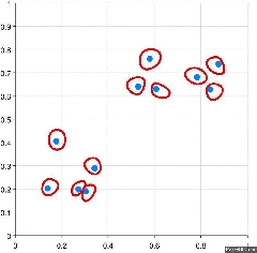

## Dendograms

A Dendrogram is a type of tree diagram showing hierarchical relationships between different sets of data.

As already said a Dendrogram contains the memory of hierarchical clustering algorithm, so just by looking at the Dendrgram you can tell how the cluster is formed.

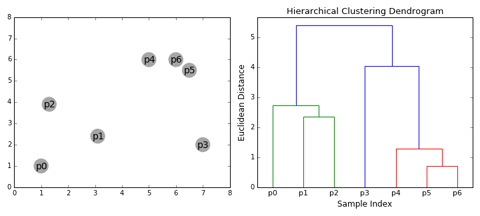



Note:-

    Distance between data points represents dissimilarities.
    Height of the blocks represents the distance between clusters.

So you can observe from the above figure that initially P5 and P6 which are closest to each other by any other point are combined into one cluster followed by P4 getting merged into the same cluster(C2). Then P1and P2 gets combined into one cluster followed by P0 getting merged into the same cluster(C4). Now P3 gets merged in cluster C2 and finally, both clusters get merged into one.

**How do you decide when to stop merging the clusters?**

You cut the dendrogram tree with a horizontal line at a height where the line can traverse the maximum distance up and down without intersecting the merging point.

For example in the below figure L3 can traverse maximum distance up and down without intersecting the merging points. So we draw a horizontal line and the number of verticle lines it intersects is the optimal number of clusters.

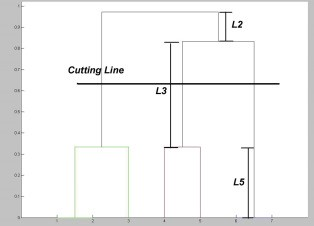

In [1]:
# load necessary files

!curl -L -o 'Mall_Customers.csv' 'https://drive.google.com/uc?export=download&id=1sgy48AZi0It6VBMQXTJbRLjlIg6E7HlY'
!curl -L -o 'Wholesale customers data.csv' 'https://drive.google.com/uc?export=download&id=1Jvqxa_KkjX8nZ5oxXe_6CzQ6aI3vVIZV'

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  4286  100  4286    0     0   1450      0  0:00:02  0:00:02 --:--:--  3009
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 15021  100 15021    0     0   5922      0  0:00:02  0:00:02 --:--:-- 13050


### Agglomerative Clustering on Mall Visitors Database

In [2]:
# importing neccessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.cluster.hierarchy as sch

Let's load the dataset

In [3]:
dataset = pd.read_csv('./Mall_Customers.csv')

In [4]:
X = dataset.iloc[:, [3, 4]].values

Next, we need to choose the number of clusters and for doing this we’ll use Dendrograms.

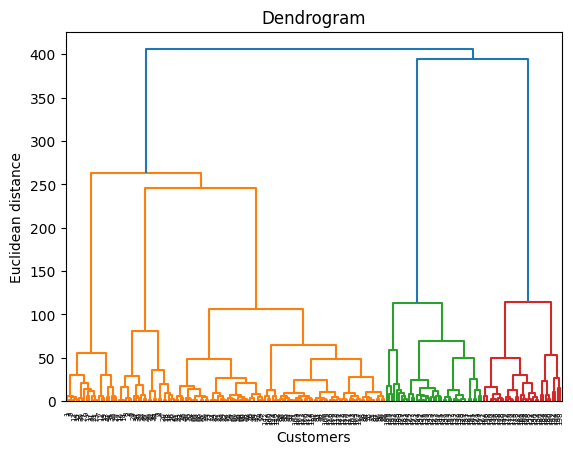

In [5]:
dendrogrm = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distance')
plt.show()

As we have already discussed to choose the number of clusters we draw a horizontal line to the longest line that traverses maximum distance up and down without intersecting the merging points. So we draw a horizontal line and the number of verticle lines it intersects is the optimal number of clusters.

In this case, it's 5. So let's fit our Agglomerative model with 5 clusters.

In [6]:
# importing AgglomerativeClustering algorithm from sklearn
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5, metric = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

#### Visualizing the results.

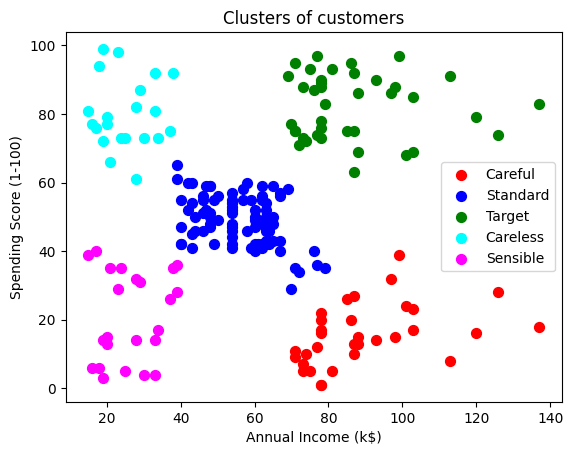

In [7]:
# Visualising the clusters
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 50, c = 'red', label = 'Careful')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 50, c = 'blue', label = 'Standard')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 50, c = 'green', label = 'Target')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 50, c = 'cyan', label = 'Careless')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 50, c = 'magenta', label = 'Sensible')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

### Solving the Wholesale Customer Segmentation problem using Hierarchical Clustering

We will be working on a wholesale customer segmentation problem. The aim of this problem is to segment the clients of a wholesale distributor based on their annual spending on diverse product categories, like milk, grocery, region, etc.

In [8]:
# import neccessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
data = pd.read_csv('./Wholesale customers data.csv')
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [10]:
from sklearn.preprocessing import normalize
data_scaled = normalize(data)
data_scaled = pd.DataFrame(data_scaled, columns=data.columns)
data_scaled.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.000112,0.000168,0.708333,0.539874,0.422741,0.011965,0.149505,0.074809
1,0.000125,0.000188,0.442198,0.614704,0.599540,0.110409,0.206342,0.111286
2,0.000125,0.000187,0.396552,0.549792,0.479632,0.150119,0.219467,0.489619
3,0.000065,0.000194,0.856837,0.077254,0.272650,0.413659,0.032749,0.115494
4,0.000079,0.000119,0.895416,0.214203,0.284997,0.155010,0.070358,0.205294


Different types of linkages -

1. 'ward’ minimizes the variance of the clusters being merged.

2. ‘average’ uses the average of the distances of each observation of the two sets.

3. ‘complete’ or ‘maximum’ linkage uses the maximum distances between all observations of the two sets.

4. ‘single’ uses the minimum of the distances between all observations of the two sets.

Let us visualize the different types of linkages.



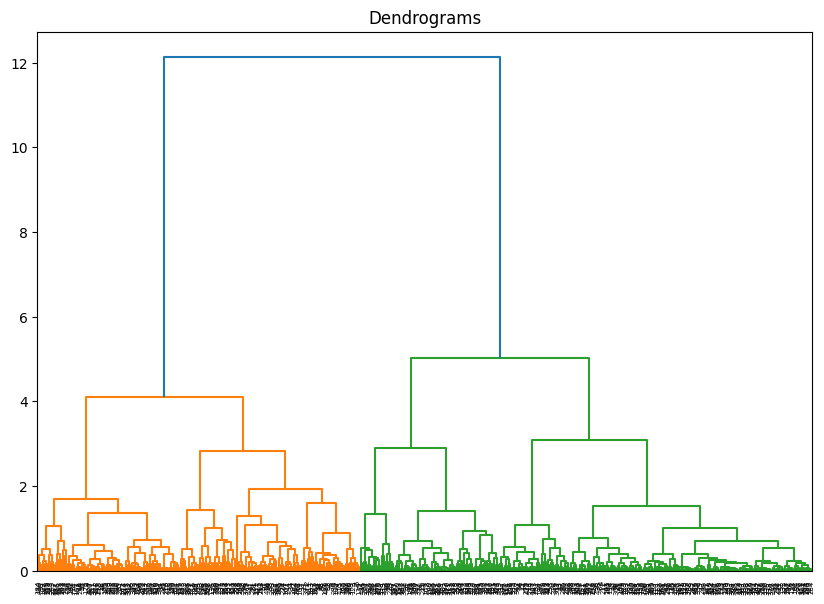

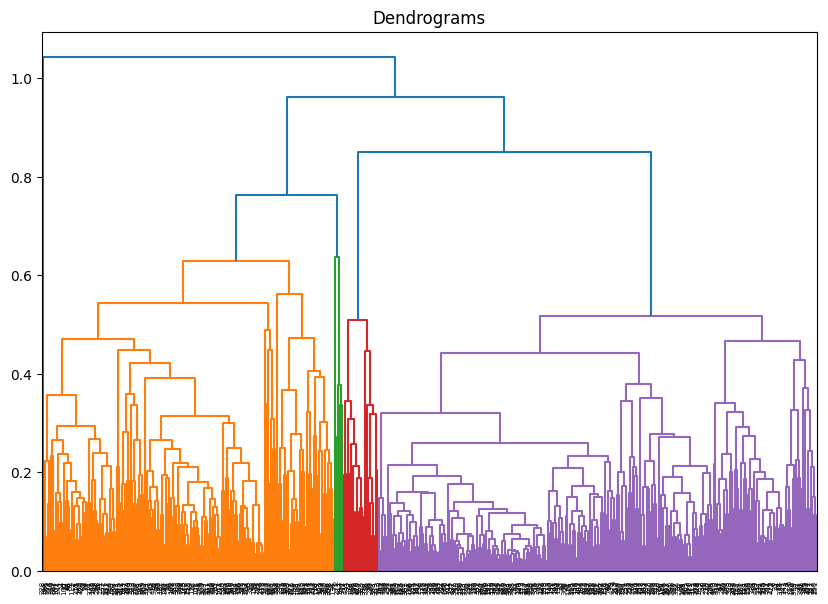

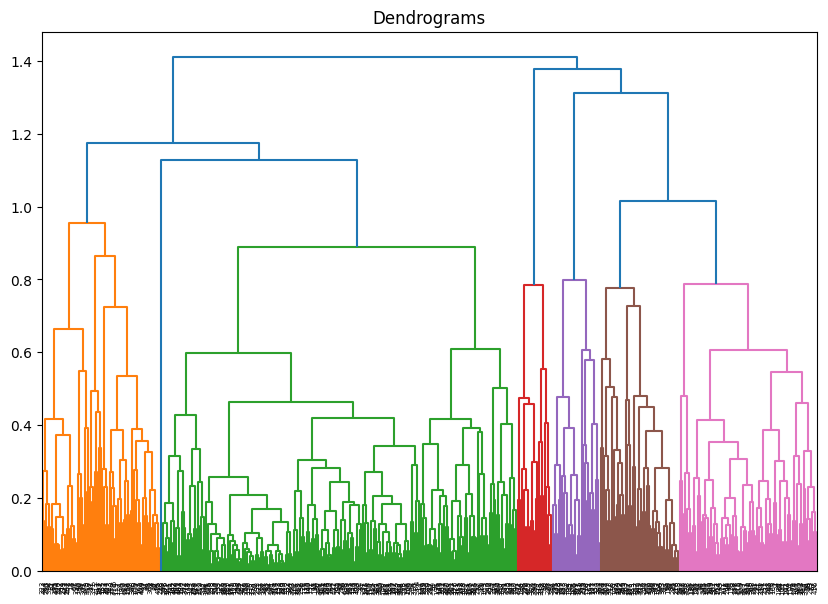

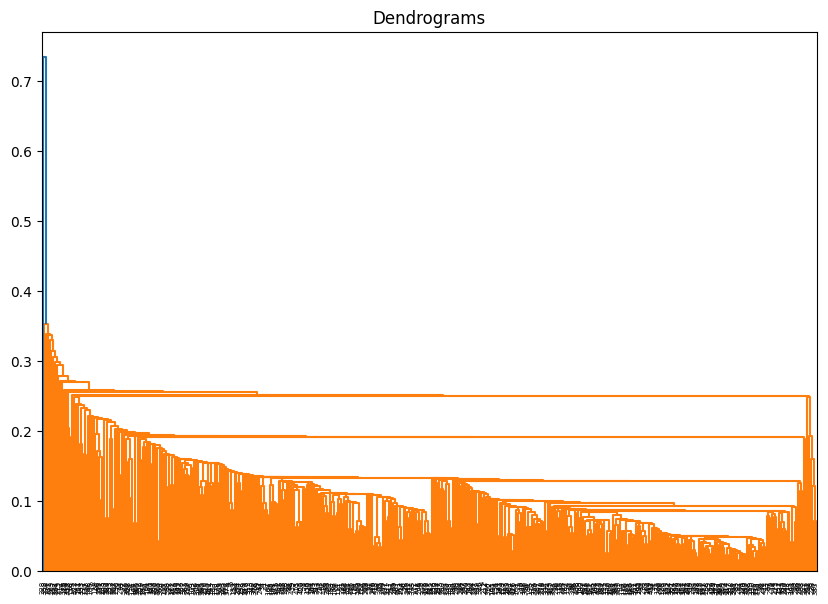

In [11]:
import scipy.cluster.hierarchy as shc
linkages = ['ward', 'average','complete','single']
for linkage in linkages:
  plt.figure(figsize=(10, 7))
  plt.title("Dendrograms")
  dend = shc.dendrogram(shc.linkage(data_scaled, method=linkage))

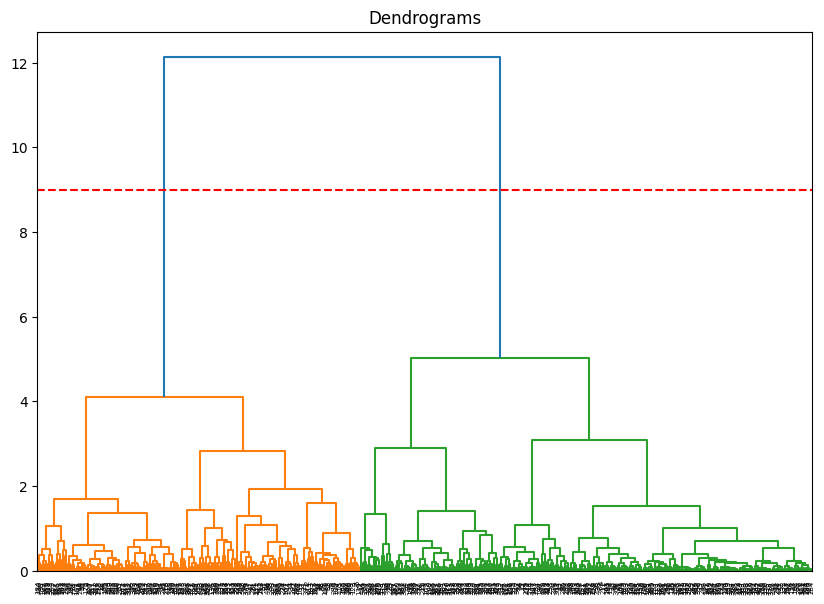

In [12]:
threshold = 9 #@param {type:"slider", min:0, max:100, step:1}

plt.figure(figsize=(10, 7))
plt.title("Dendrograms")
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))
plt.axhline(y=threshold, color='r', linestyle='--')

In [13]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='ward')
cluster.fit_predict(data_scaled)

array([1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,

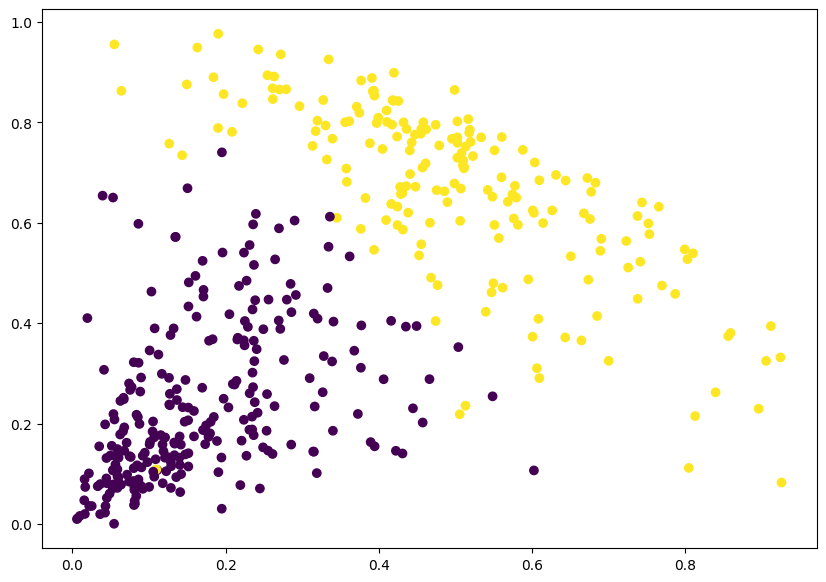

In [14]:
plt.figure(figsize=(10, 7))
plt.scatter(data_scaled['Milk'], data_scaled['Grocery'], c=cluster.labels_)

## Divisive Hierarchical Clustering

In Divisive or DIANA(DIvisive ANAlysis Clustering) is a top-down clustering method where we assign all of the observations to a single cluster and then partition the cluster to two least similar clusters. Finally, we proceed recursively on each cluster until there is one cluster for each observation. So this clustering approach is exactly opposite to Agglomerative clustering.

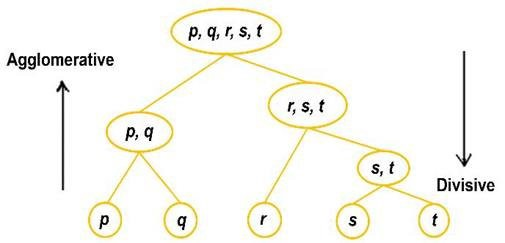

There is evidence that divisive algorithms produce more accurate hierarchies than agglomerative algorithms in some circumstances but is conceptually more complex.

In both agglomerative and divisive hierarchical clustering, users need to specify the desired number of clusters as a termination condition(when to stop merging).

Divisive clustering methods are fairly complicated to implement, so we will not do that here. You can check out open source implementations like https://github.com/div338/Divisive-Clustering-Analysis-Program-DIANA- for further details.

## Points to think about
1. What is the need for hierarchical clustering?
2. What are the key differences between KMeans Clustering and Hierarchical Clustering?
3. What is the advantages of Density Based Clustering over KMeans?

Answer:1
---------------------

Hierarchical clustering is useful for several reasons:



No Need for Predefined Number of Clusters:
---------------------------
Unlike k-means clustering, hierarchical clustering doesn’t require you to specify the number of clusters in advance. It produces a tree-like structure (dendrogram) that allows you to decide the optimal number of clusters based on how you cut the tree.



Interpretability:
---------------------
 The dendrogram provides a visual representation of the hierarchy of clusters, which can be helpful for understanding the relationships between data points at different levels of granularity.



Flexibility in Distance Metrics:
---------------------------
 Hierarchical clustering can use various distance metrics (e.g., Euclidean, Manhattan, cosine) and linkage criteria (e.g., single, complete, average, or Ward’s), allowing it to adapt to different types of data.



Capturing Nested Structures:
-------------------------------
 Since hierarchical clustering creates a hierarchy, it’s particularly useful when the data has nested groupings or multiple levels of relationships, which might not be obvious with flat clustering methods like k-means.



Works with Small Datasets:
-----------------------------
Hierarchical clustering is suitable for smaller datasets since it involves calculating distances between all pairs of points, which can be computationally expensive for larger datasets.



Robustness to Outliers:
----------------------------
While not entirely immune to outliers, hierarchical clustering tends to be more robust than methods like k-means because outliers often end up in their own clusters or are merged into larger groups at higher levels in the hierarchy.



In summary, hierarchical clustering is particularly valuable when you need flexibility in the number of clusters, want a visual representation of relationships, or need a method that captures nested structures.

Answer:2
-----------------------------

Here are the key differences between K-Means Clustering and Hierarchical Clustering:

1. Clustering Approach
--------------------------------------

K-Means Clustering:
---------------------------

A partitional clustering method that divides data into a predefined number of clusters (k).
It requires you to specify the number of clusters before starting the algorithm.


Hierarchical Clustering:

--------------------------------
A hierarchical clustering method that builds a hierarchy of clusters.
It doesn’t require specifying the number of clusters upfront. You can determine the number of clusters after the dendrogram is generated by cutting the tree at a specific level.



2. Number of Clusters:
----------------------------------------

K-Means Clustering:
---------------------------
Requires you to predefine the number of clusters, k. The algorithm will attempt to divide the data into exactly k clusters.


Hierarchical Clustering:
---------------------------------------
Does not require you to predefine the number of clusters. You can choose how many clusters you want after examining the dendrogram.



3. Cluster Shape
---------------------------------------
K-Means Clustering:
------------------------
Assumes clusters to be spherical and of roughly similar size. It works best when clusters are well-separated and roughly circular.


Hierarchical Clustering:
---------------------------------------
More flexible in terms of cluster shape. It can handle non-spherical clusters, making it suitable for datasets where clusters have irregular shapes.



4. Distance Measure
---------------------------------------
K-Means Clustering:
-----------------------
Typically uses Euclidean distance to measure similarity between data points.


Hierarchical Clustering:
-----------------------------------
Can use different types of distance metrics such as Euclidean, Manhattan, Cosine, etc. The choice of distance metric can affect the clustering outcome.



5. Cluster Merging
-------------------------------------
K-Means Clustering:
----------------------------
Works by iteratively assigning data points to the nearest centroid and recalculating the centroid after each iteration. Once clusters are formed, they do not change.


Hierarchical Clustering:
---------------------------------------
Builds the cluster hierarchy step-by-step by either agglomeratively (bottom-up) or divisively (top-down) merging or splitting clusters based on distance metrics. The clustering is updated at each step.



6. Computational Complexity
---------------------------------------
K-Means Clustering:
-------------------------
Computationally efficient with a complexity of O(n * k * t), where n is the number of data points, k is the number of clusters, and t is the number of iterations.


Hierarchical Clustering:
-------------------------------------
More computationally expensive, with a complexity of O(n²) for the agglomerative approach. This makes it less suitable for large datasets.



7. Sensitivity to Outliers
---------------------------------------
K-Means Clustering:
---------------------
Sensitive to outliers, as the centroid is affected by extreme values.


Hierarchical Clustering:

More robust to outliers, especially with methods like complete-linkage, where outliers are less likely to be merged into clusters.



8. Scalability
------------------------------------
K-Means Clustering:
----------------------
Scales well to large datasets because it converges relatively quickly, especially when the number of clusters is fixed.


Hierarchical Clustering:
-----------------------
Less scalable to large datasets due to its O(n²) complexity. It is more suited for small to medium-sized datasets.



9. Interpretability
------------------------------------
K-Means Clustering:
-----------------------
Produces a flat clustering structure, which may be easier to understand but lacks insight into the relationships between clusters.


Hierarchical Clustering:
-----------------------
Provides a dendrogram that offers deeper insight into how clusters relate to each other, making it more interpretable when you need to understand the hierarchy of clusters.



10. Initialization
-------------------------------------
K-Means Clustering:
---------------------
Sensitive to initial cluster centroids. Different initializations may lead to different final clusters (though using techniques like k-means++ can mitigate this issue).


Hierarchical Clustering:
----------------------
Does not require any initialization. It’s deterministic and depends solely on the data and chosen distance metric.



Summary Table:
----------------------
In essence, K-Means is faster and works well when you know the number of clusters beforehand and expect roughly spherical clusters. Hierarchical Clustering, on the other hand, is more flexible, provides insights into cluster relationships, but is computationally expensive and less scalable for large datasets.

Answer:3
---------------------------
Density-based clustering methods, like DBSCAN (Density-Based Spatial Clustering of Applications with Noise), have several advantages over K-Means clustering, especially in handling specific types of data. Here are the key advantages:

1. Handling of Arbitrary-Shaped Clusters
--------------------

DBSCAN: Can identify clusters of arbitrary shapes, not restricted to spherical or circular shapes. It works well with datasets where clusters are irregular or have different densities.
K-Means: Assumes clusters are spherical and of similar size. It tends to perform poorly when clusters have irregular shapes or varying densities.

2. No Need to Predefine the Number of Clusters
----------------------

DBSCAN: Does not require specifying the number of clusters in advance. The algorithm automatically determines the number of clusters based on density parameters (eps and min_samples).
K-Means: Requires you to predefine the number of clusters, k. You have to guess or experiment to find the optimal value for k.

3. Ability to Identify Outliers (Noise).  -------------------

DBSCAN: Effectively identifies outliers (or noise) as points that do not belong to any cluster. These points are marked as "noise" and are excluded from the clustering process.
K-Means: Does not explicitly handle outliers. Outliers are assigned to the nearest cluster and can significantly affect the centroids, distorting the final clustering results.

4. Better for Clusters of Varying Densities
---------------------

DBSCAN: Works well when clusters have different densities. It can discover dense regions and separate them from sparse regions, even if the density of the clusters is uneven.
K-Means: Struggles with clusters that have varying densities. It tends to force the data into a fixed number of clusters and may produce poor results when the data distribution is skewed.

5. Robustness to Irregularly Spaced Data
--------------------

DBSCAN: Can handle data with uneven spacing or non-uniformly distributed points better than K-Means. This makes DBSCAN more adaptable to real-world data where data points are often unevenly distributed.
K-Means: Assumes equal variance within clusters, which means it performs poorly when the data points are not uniformly distributed or vary significantly in distance.

6. No Need for Initialization
--------------------
DBSCAN: Does not require initialization of cluster centroids. The algorithm works by grouping points based on their local density, which avoids the problem of sensitive initialization seen in K-Means.
K-Means: Sensitive to the initial placement of centroids. Different initializations can lead to different final cluster configurations (this can be mitigated with techniques like K-Means++).

7. Scalability with Large Datasets (In Some Cases)
-------------------

DBSCAN: Can scale well with large datasets that are not too sparse, especially with optimizations (e.g., using KD-Trees or Ball Trees for efficient nearest neighbor search).
K-Means: Also scales well but can struggle with very large datasets or datasets with complex structures, especially when k is large.

8. More Flexibility with Cluster Size
--------------------

DBSCAN: Can form clusters of varying sizes. Because DBSCAN relies on the density of points, it can identify both large and small clusters based on the density parameters.
K-Means: Tends to form clusters of similar sizes due to the centroid-based approach, which can be limiting when the true clusters vary in size.

Summary of Advantages:
--------------------
Conclusion:
-----------------

DBSCAN is particularly useful for datasets with irregularly shaped clusters, varying densities, and the presence of outliers. It's more robust in real-world scenarios, where clusters may not always be well-separated or of uniform size. On the other hand, K-Means is more suitable for scenarios where you know the number of clusters, and the data follows a more structured or spherical shape with relatively equal cluster sizes.

## Conclusion


Hierarchical clustering is a very useful way of segmentation. The advantage of not having to pre-define the number of clusters gives it quite an edge over k-Means. However, it doesn't work well when we have huge amount of data.

## Resources and References

1. https://en.wikipedia.org/wiki/Hierarchical_clustering
2. https://www.analyticsvidhya.com/blog/2019/05/beginners-guide-hierarchical-clustering/
3. https://towardsdatascience.com/understanding-the-concept-of-hierarchical-clustering-technique-c6e8243758ec
4. https://www.kdnuggets.com/2019/09/hierarchical-clustering.html

### Exercises

* Play around with different linkages and thresholds for Mall data, then use the same code base for IRIS and DIGITS dataset, to see if the optimal clusters is reasonable or not (iris should be three, digits should be 10)

* Compare the results of the that with Kmeans on the same datasets, this would require using Kmeans on Mall dataset and Wholesale customer dataset.

Exercise-1:
---------------
To explore different linkages and thresholds using hierarchical clustering, we can apply the same approach to the Mall, Iris, and Digits datasets. We'll start by testing various linkage methods and thresholds for the Mall dataset, then apply the same approach to the Iris and Digits datasets to verify if the clustering results make sense (i.e., 3 clusters for Iris and 10 clusters for Digits).

Here’s how we can do it in Python:

Step 1: Set up the environment and load the datasets

We'll first import the necessary libraries and load the datasets (Iris and Digits from sklearn, and Mall from a random generated example if you don't provide actual data).

Step 2: Apply hierarchical clustering using different linkages

We'll then perform hierarchical clustering with different linkages (single, complete, average, ward) and cut the dendrogram at various thresholds to find the number of clusters. Afterward, we’ll check if the number of clusters for Iris and Digits is reasonable.

import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.datasets import load_iris, load_digits
from sklearn.preprocessing import StandardScaler

# Load the datasets
iris = load_iris()
digits = load_digits()

# Mall data (for example purposes, we'll create a random dataset)
# You should replace this with actual Mall data if available
mall_data = np.random.rand(200, 2)  # Replace with actual Mall data

# Standardize the datasets
scaler = StandardScaler()
mall_data = scaler.fit_transform(mall_data)
iris_data = scaler.fit_transform(iris.data)
digits_data = scaler.fit_transform(digits.data)

# Function to perform hierarchical clustering and plot dendrogram
def hierarchical_clustering(data, linkage_method='ward', threshold=1.5):
    # Perform hierarchical/agglomerative clustering
    linked = linkage(data, method=linkage_method)

    # Create a dendrogram
    plt.figure(figsize=(10, 7))
    dendrogram(linked)
    plt.title(f'Dendrogram with {linkage_method} linkage')
    plt.xlabel('Data points')
    plt.ylabel('Euclidean distance')
    plt.show()

    # Define clusters by cutting the dendrogram at the threshold
    clusters = fcluster(linked, t=threshold, criterion='distance')
    return clusters

# Apply hierarchical clustering to Mall Data, Iris, and Digits with different thresholds
# Try with different linkage methods and threshold values

# Example for Mall Data
linkage_methods = ['single', 'complete', 'average', 'ward']
thresholds = [1.0, 1.5, 2.0]

for linkage_method in linkage_methods:
    for threshold in thresholds:
        print(f"Applying {linkage_method} linkage with threshold {threshold} on Mall data...")
        clusters = hierarchical_clustering(mall_data, linkage_method, threshold)

# Apply to Iris dataset
print("Applying hierarchical clustering on Iris dataset...")
for linkage_method in linkage_methods:
    for threshold in thresholds:
        print(f"Applying {linkage_method} linkage with threshold {threshold} on Iris data...")
        clusters = hierarchical_clustering(iris_data, linkage_method, threshold)
        unique_clusters = np.unique(clusters)
        print(f"Number of clusters in Iris: {len(unique_clusters)} (Expected 3 clusters)")

# Apply to Digits dataset
print("Applying hierarchical clustering on Digits dataset...")
for linkage_method in linkage_methods:
    for threshold in thresholds:
        print(f"Applying {linkage_method} linkage with threshold {threshold} on Digits data...")
        clusters = hierarchical_clustering(digits_data, linkage_method, threshold)
        unique_clusters = np.unique(clusters)
        print(f"Number of clusters in Digits: {len(unique_clusters)} (Expected 10 clusters)")

Explanation:

1. Mall Dataset: This is a randomly generated dataset for demonstration. You should replace it with your actual Mall data.


2. Standardization: We standardize all datasets using StandardScaler so that the clustering is not biased by differing feature scales.


3. Hierarchical Clustering: We use the linkage function from scipy with different linkage methods (single, complete, average, ward). The threshold (t) is varied to experiment with different cluster cutoffs.


4. Dendrogram Plotting: We plot a dendrogram for visual inspection, allowing you to see how the data clusters at different distances.


5. Cluster Extraction: The fcluster function cuts the dendrogram at a specific threshold (t) to obtain clusters and checks how many clusters are formed.


6. Iris and Digits: We specifically check if the clustering results for the Iris dataset produce 3 clusters and for the Digits dataset produce 10 clusters.



What to Expect:

For Iris: The optimal number of clusters should be around 3 (because the Iris dataset has 3 classes: Setosa, Versicolor, and Virginica).

For Digits: The optimal number of clusters should be around 10 (since the Digits dataset has 10 classes corresponding to the digits 0-9).


Fine-Tuning:

You can adjust the threshold and linkage methods further to observe how clustering performance changes. The choice of linkage can significantly affect the resulting clusters, especially in complex datasets.

Let me know if you need more details or adjustments!

Applying single linkage with threshold 1.0 on Mall data...


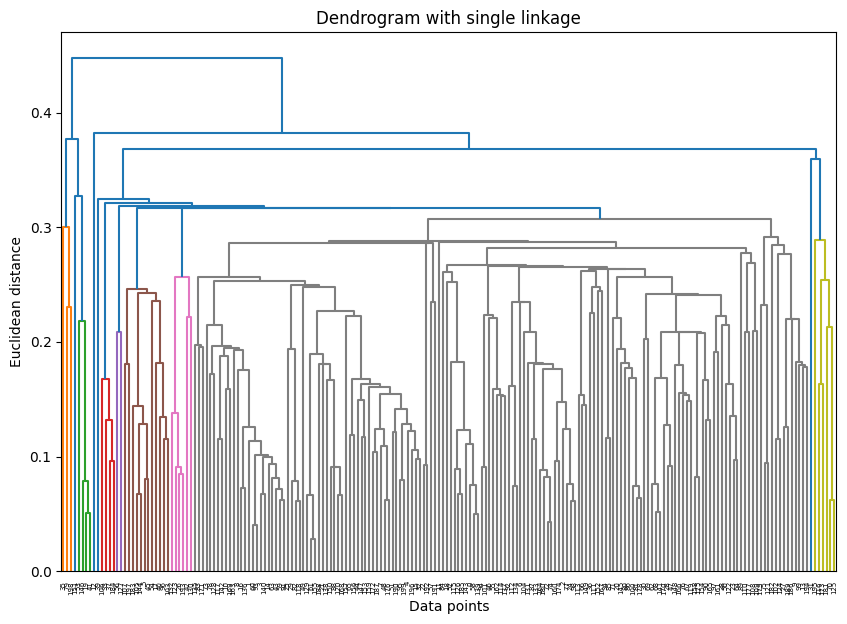

Applying single linkage with threshold 1.5 on Mall data...


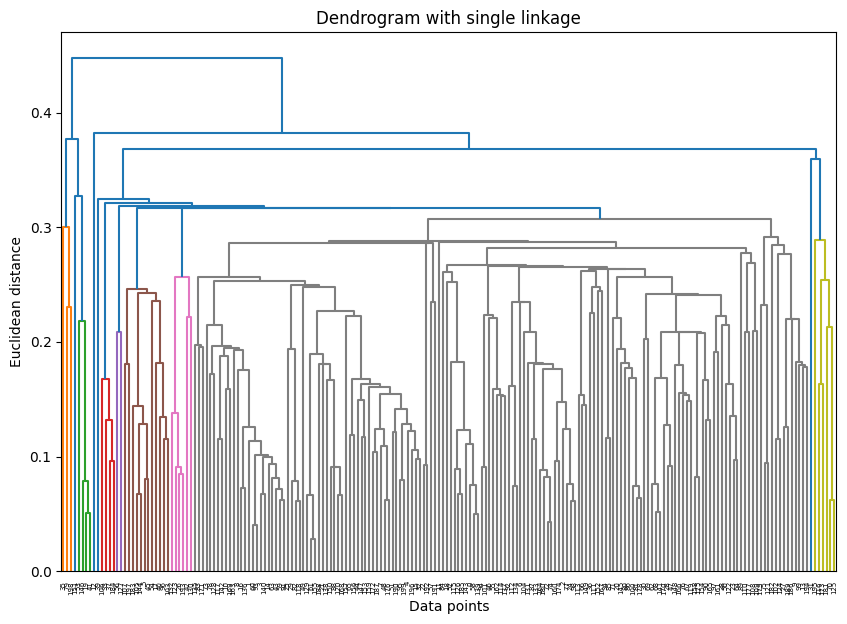

Applying single linkage with threshold 2.0 on Mall data...


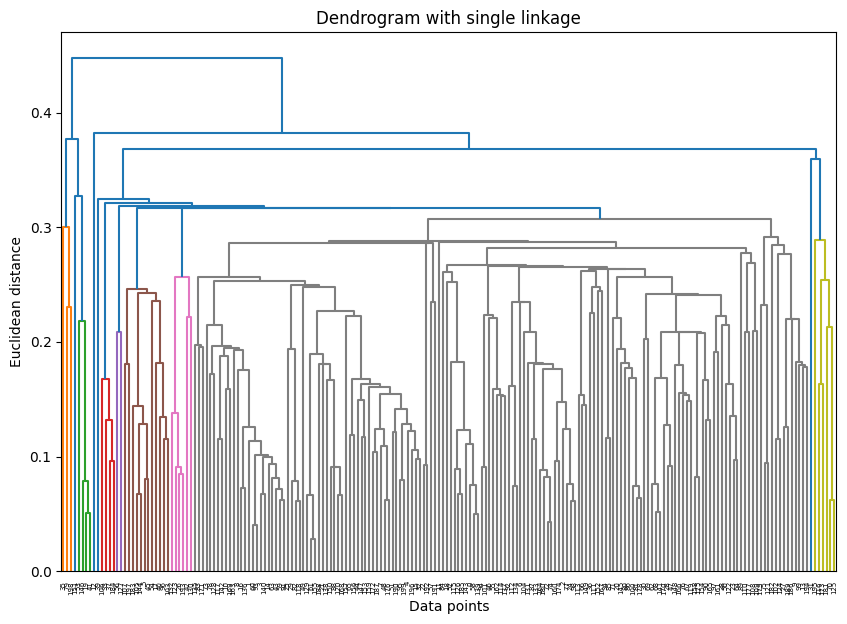

Applying complete linkage with threshold 1.0 on Mall data...


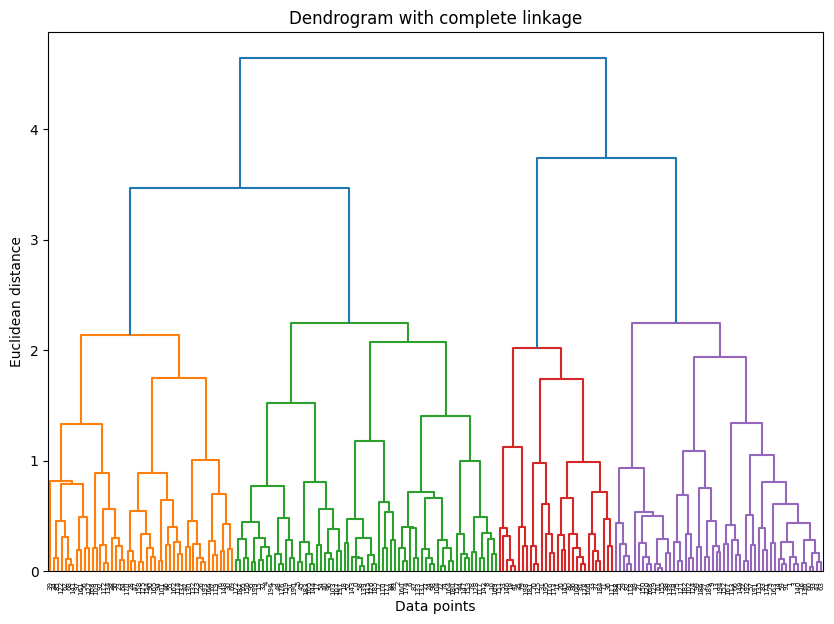

Applying complete linkage with threshold 1.5 on Mall data...


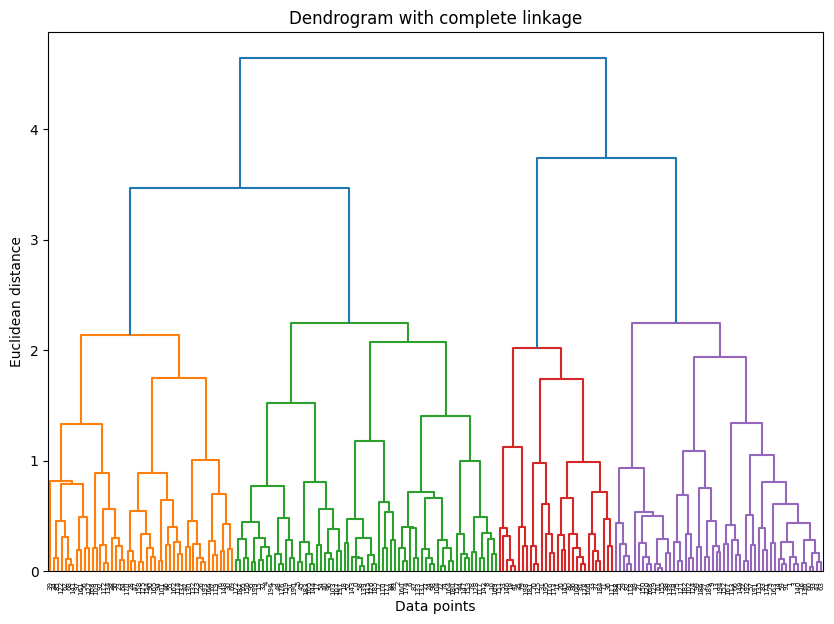

Applying complete linkage with threshold 2.0 on Mall data...


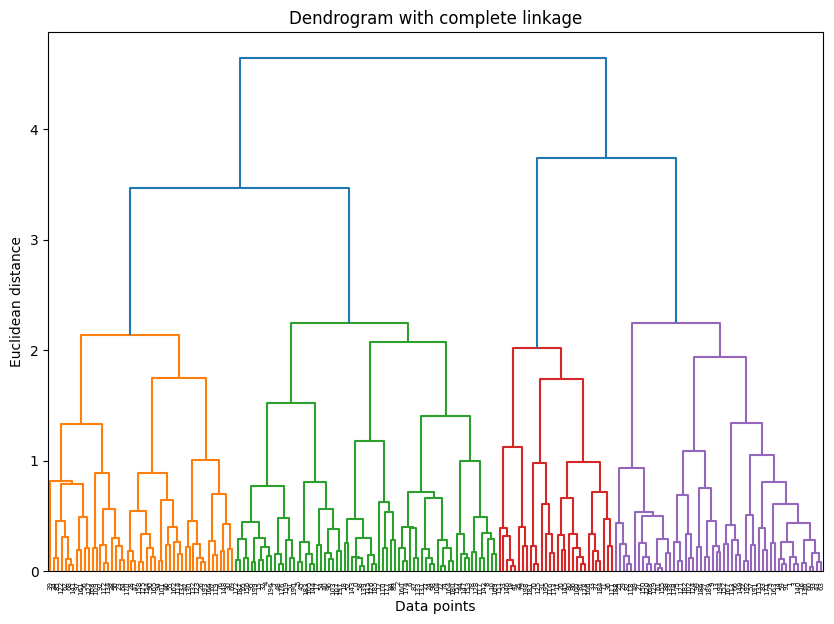

Applying average linkage with threshold 1.0 on Mall data...


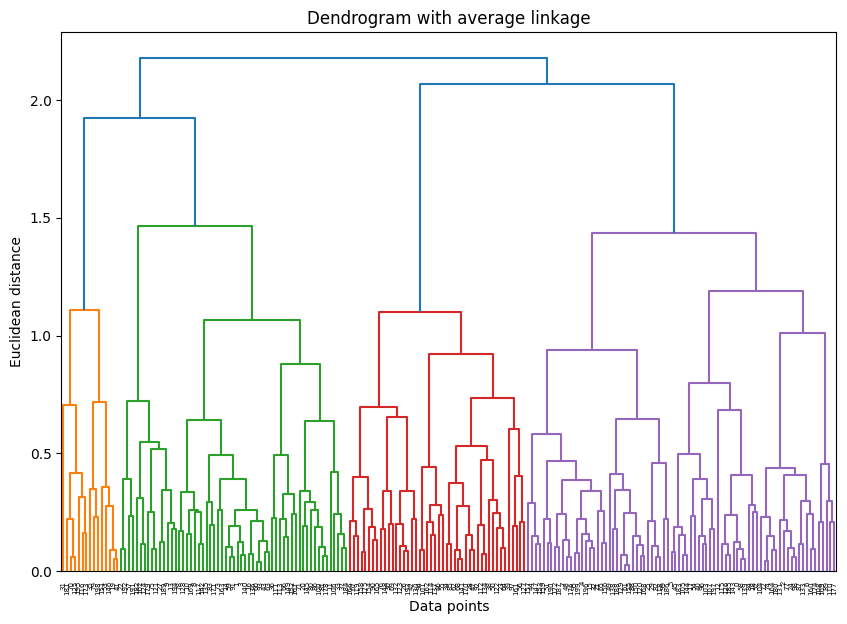

Applying average linkage with threshold 1.5 on Mall data...


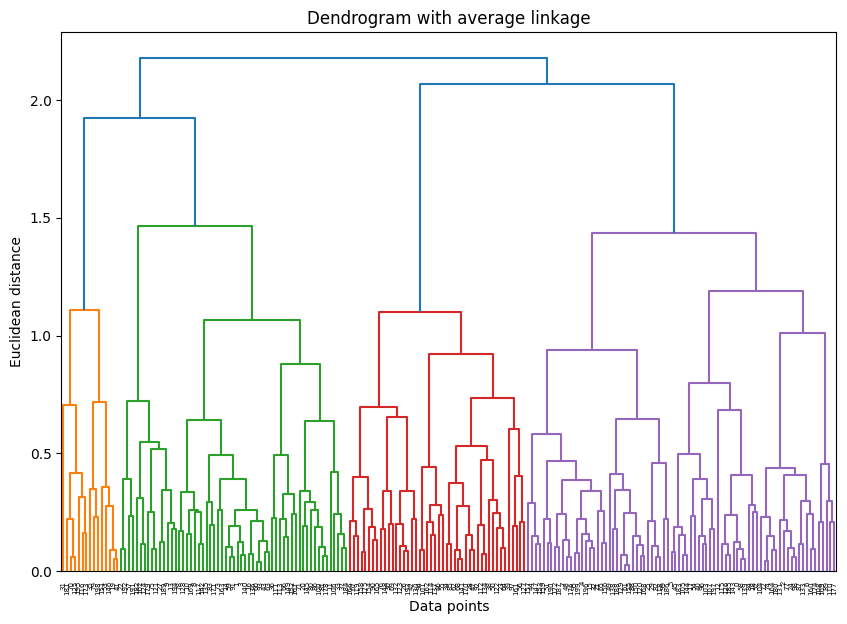

Applying average linkage with threshold 2.0 on Mall data...


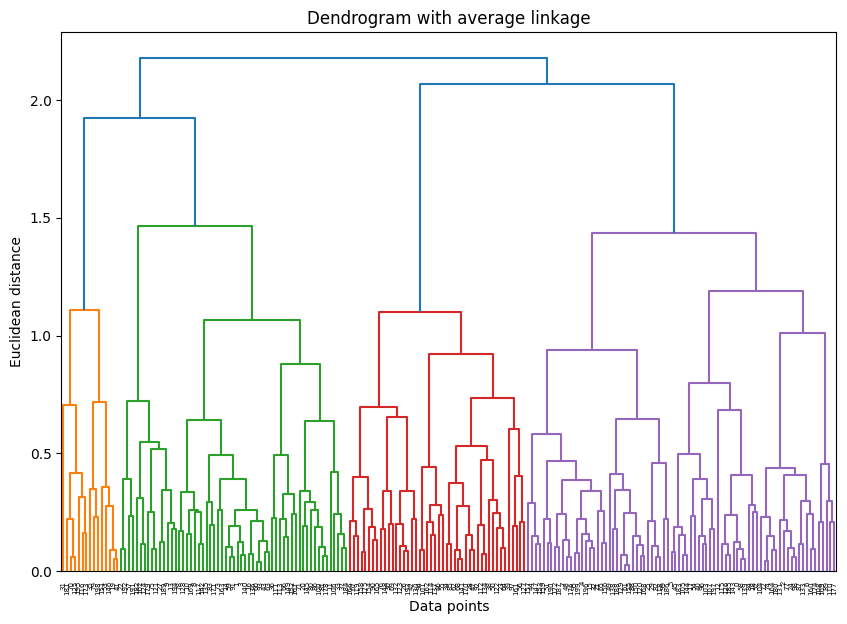

Applying ward linkage with threshold 1.0 on Mall data...


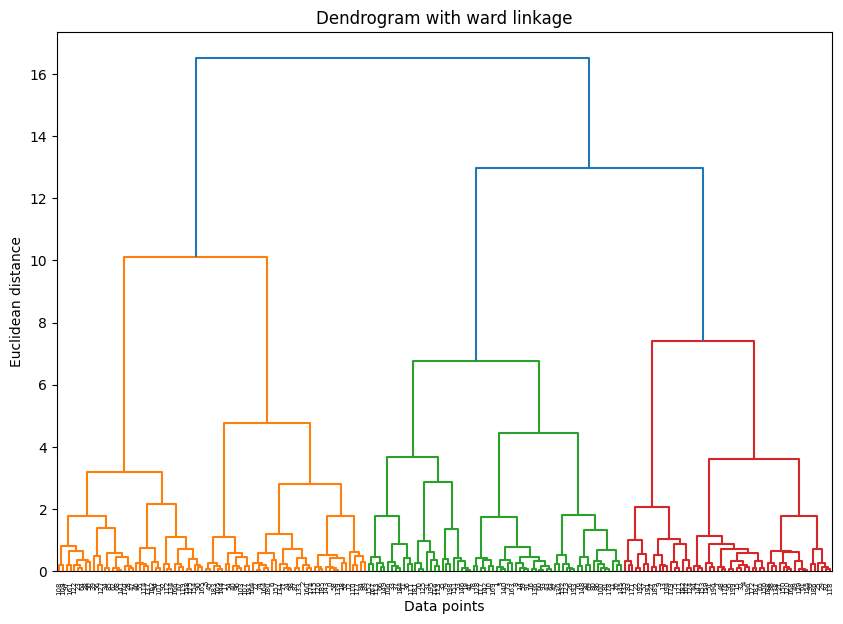

Applying ward linkage with threshold 1.5 on Mall data...


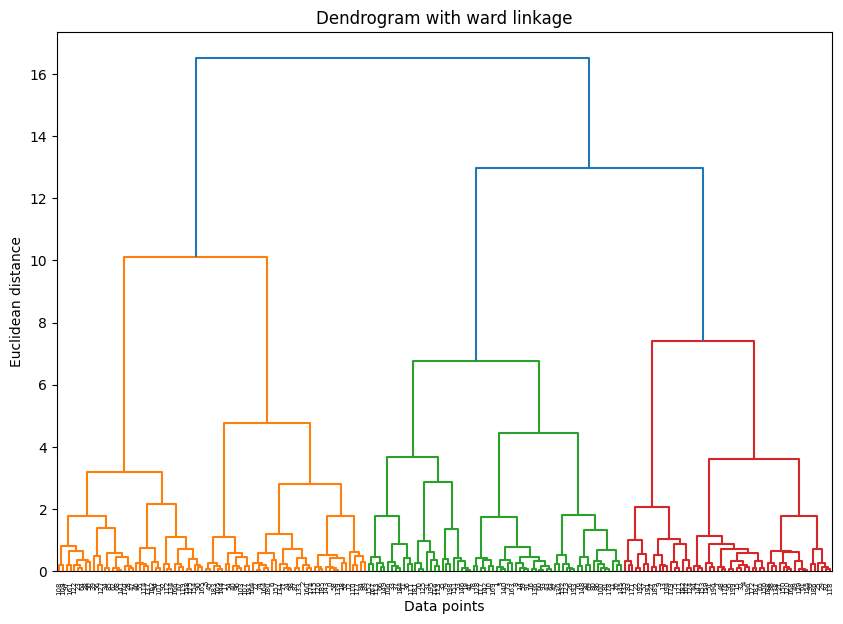

Applying ward linkage with threshold 2.0 on Mall data...


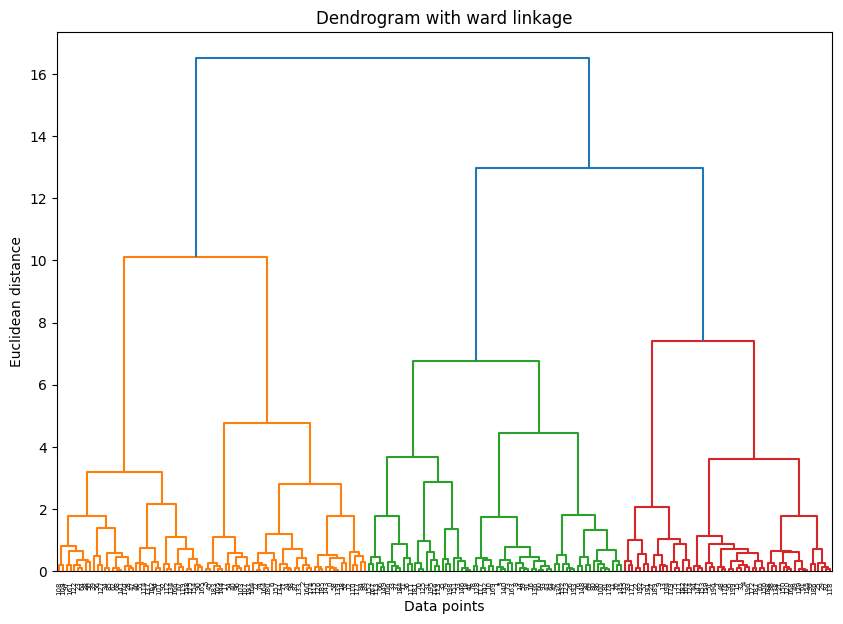

Applying hierarchical clustering on Iris dataset...
Applying single linkage with threshold 1.0 on Iris data...


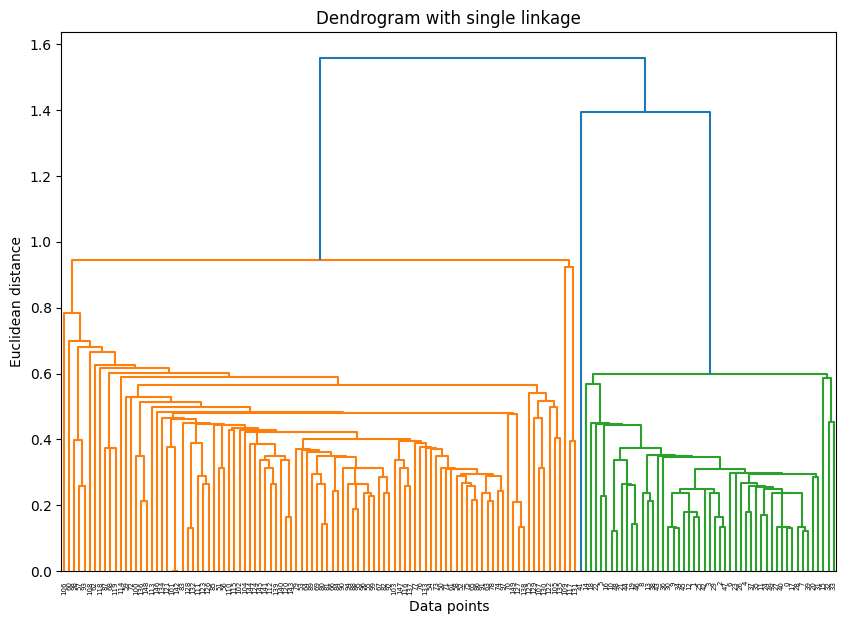

Number of clusters in Iris: 3 (Expected 3 clusters)
Applying single linkage with threshold 1.5 on Iris data...


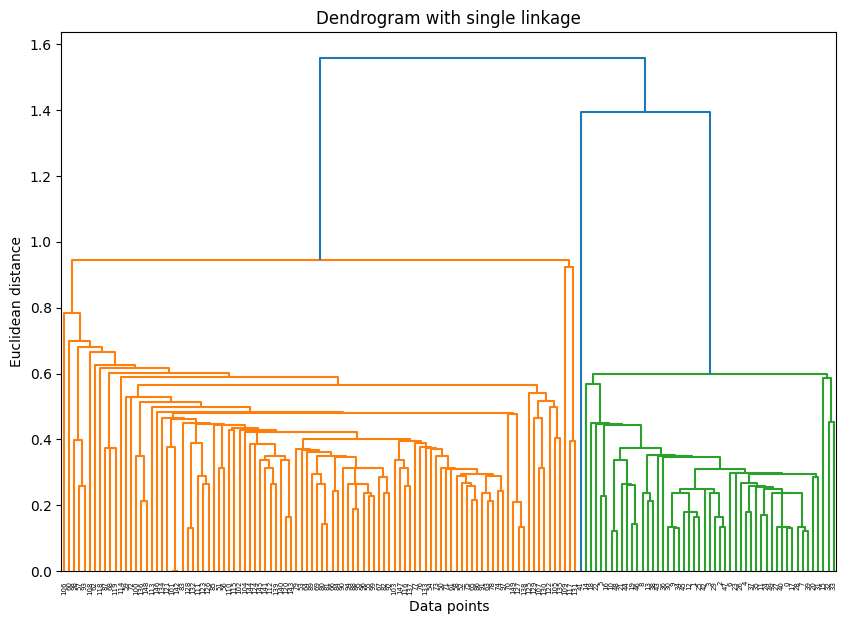

Number of clusters in Iris: 2 (Expected 3 clusters)
Applying single linkage with threshold 2.0 on Iris data...


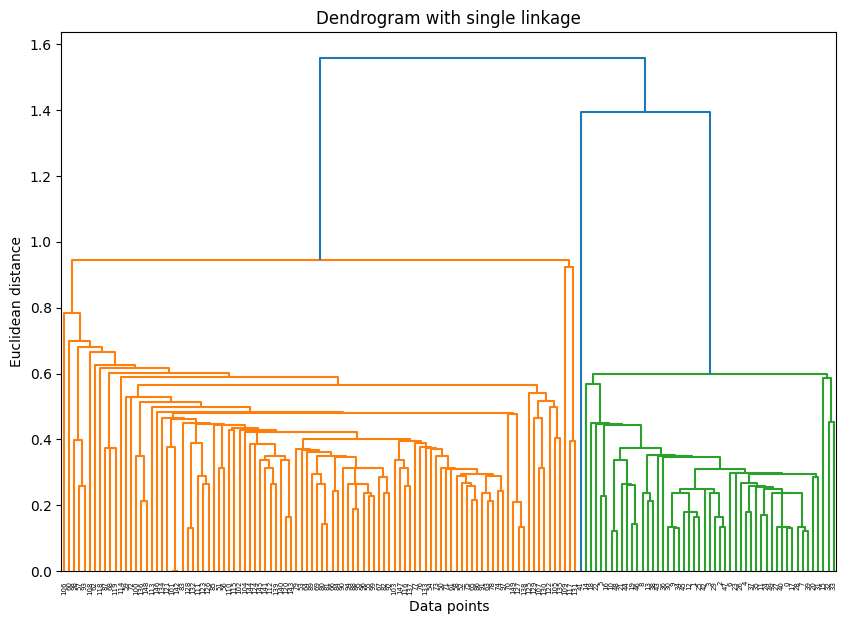

Number of clusters in Iris: 1 (Expected 3 clusters)
Applying complete linkage with threshold 1.0 on Iris data...


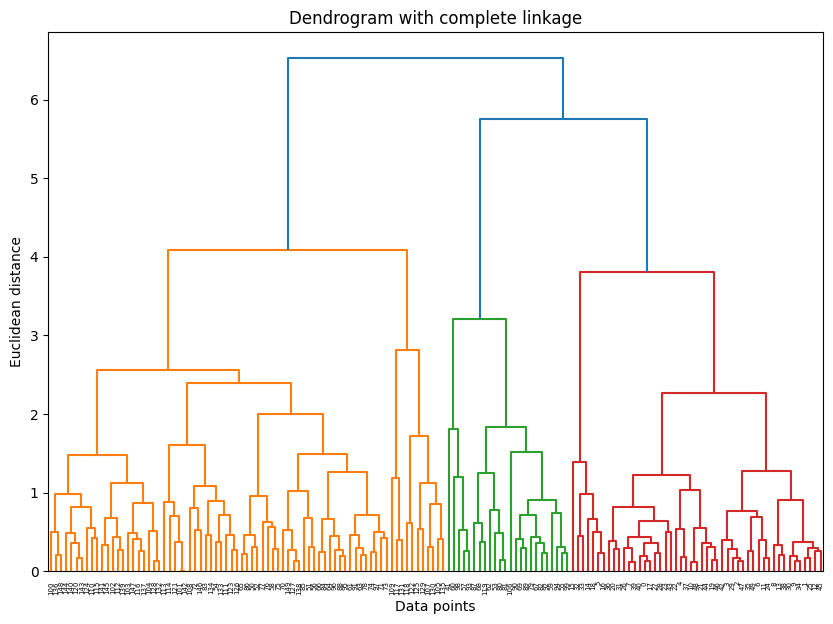

Number of clusters in Iris: 30 (Expected 3 clusters)
Applying complete linkage with threshold 1.5 on Iris data...


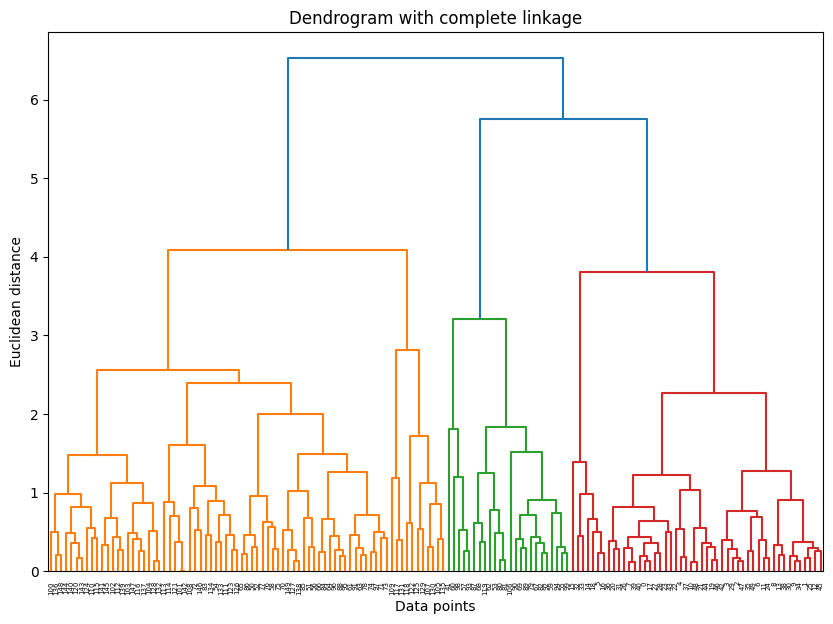

Number of clusters in Iris: 16 (Expected 3 clusters)
Applying complete linkage with threshold 2.0 on Iris data...


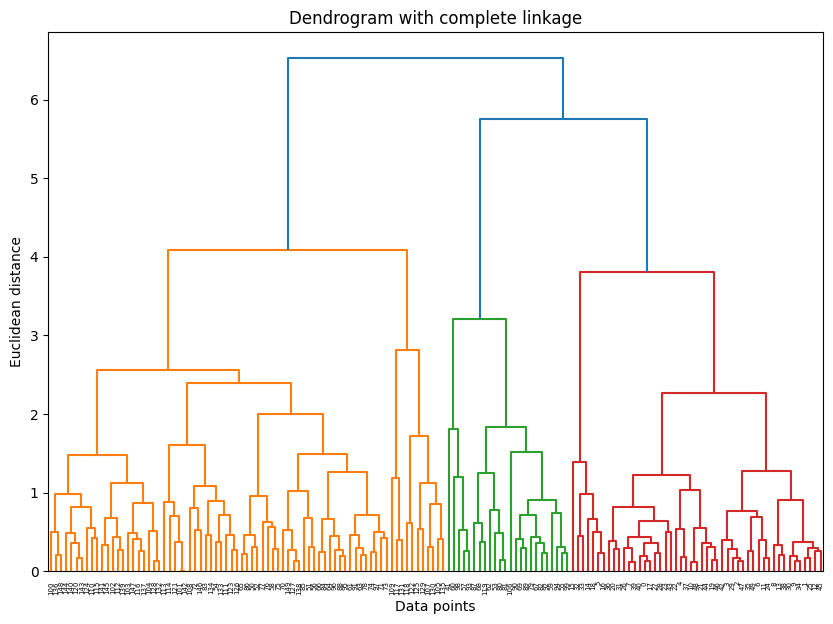

Number of clusters in Iris: 11 (Expected 3 clusters)
Applying average linkage with threshold 1.0 on Iris data...


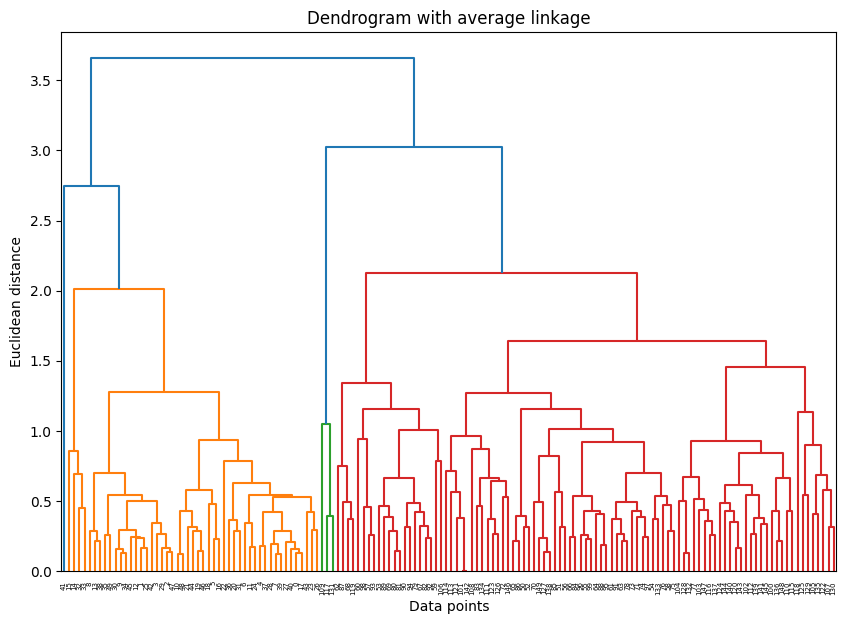

Number of clusters in Iris: 17 (Expected 3 clusters)
Applying average linkage with threshold 1.5 on Iris data...


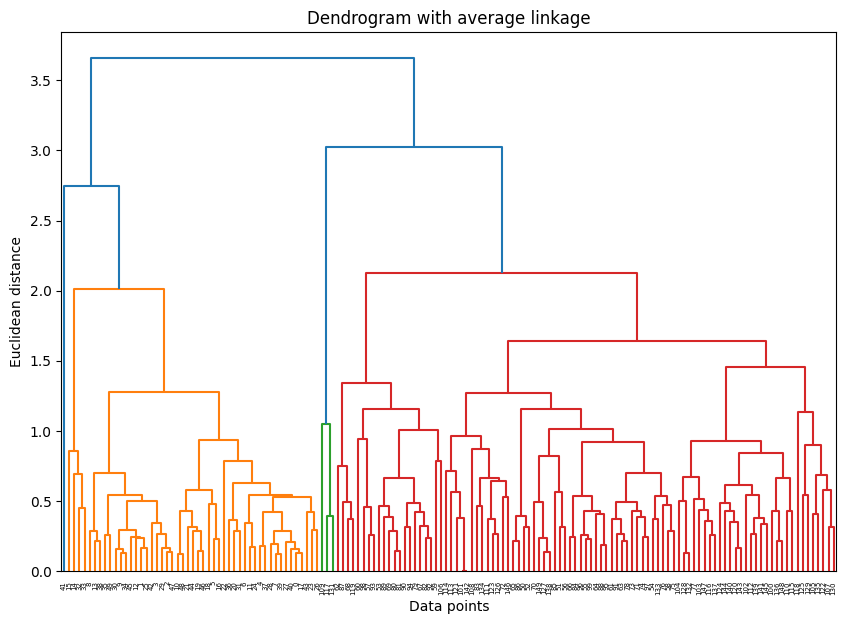

Number of clusters in Iris: 7 (Expected 3 clusters)
Applying average linkage with threshold 2.0 on Iris data...


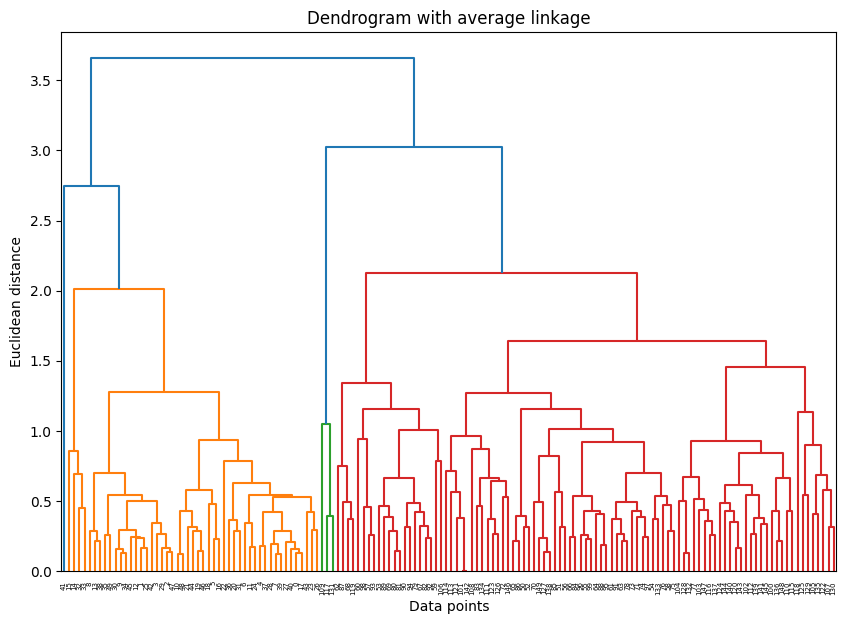

Number of clusters in Iris: 6 (Expected 3 clusters)
Applying ward linkage with threshold 1.0 on Iris data...


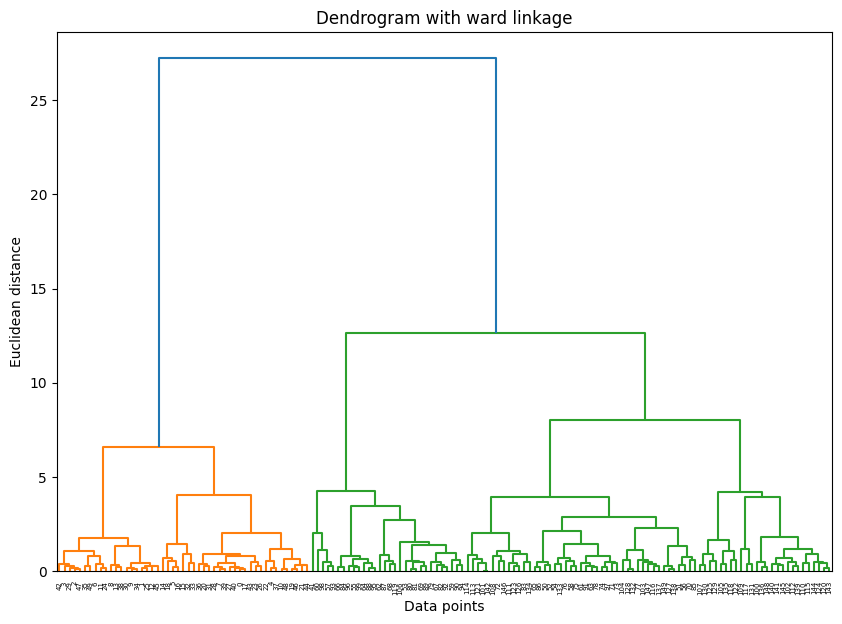

Number of clusters in Iris: 35 (Expected 3 clusters)
Applying ward linkage with threshold 1.5 on Iris data...


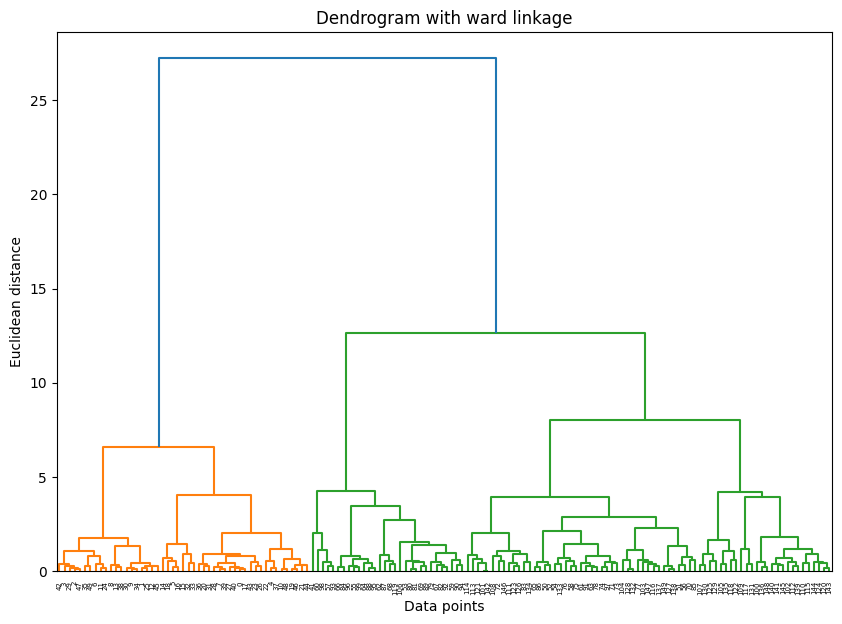

Number of clusters in Iris: 22 (Expected 3 clusters)
Applying ward linkage with threshold 2.0 on Iris data...


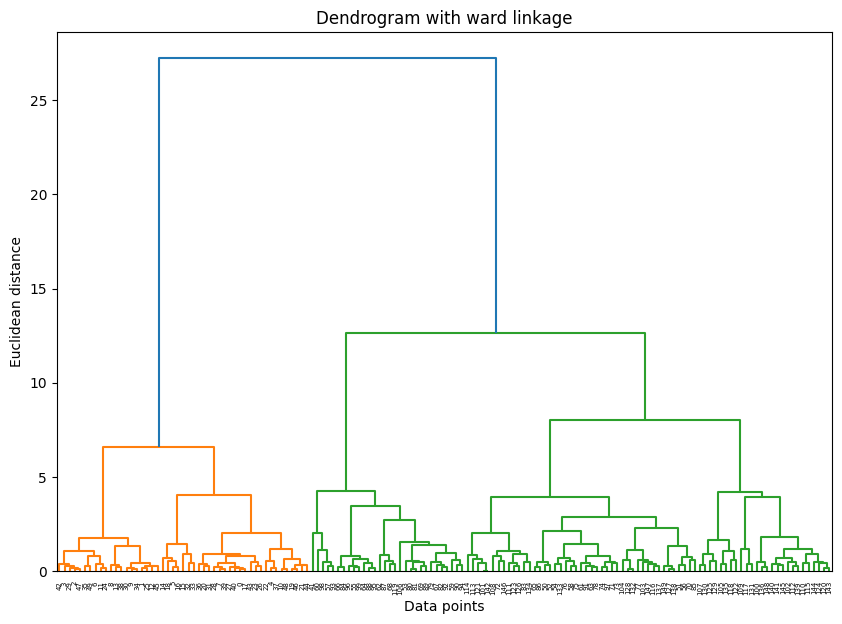

Number of clusters in Iris: 18 (Expected 3 clusters)
Applying hierarchical clustering on Digits dataset...
Applying single linkage with threshold 1.0 on Digits data...


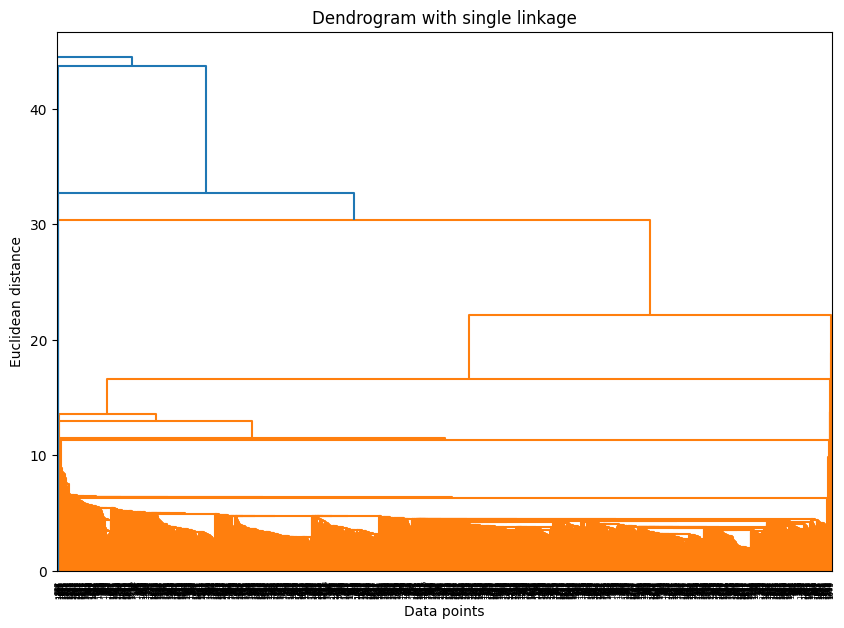

Number of clusters in Digits: 1796 (Expected 10 clusters)
Applying single linkage with threshold 1.5 on Digits data...


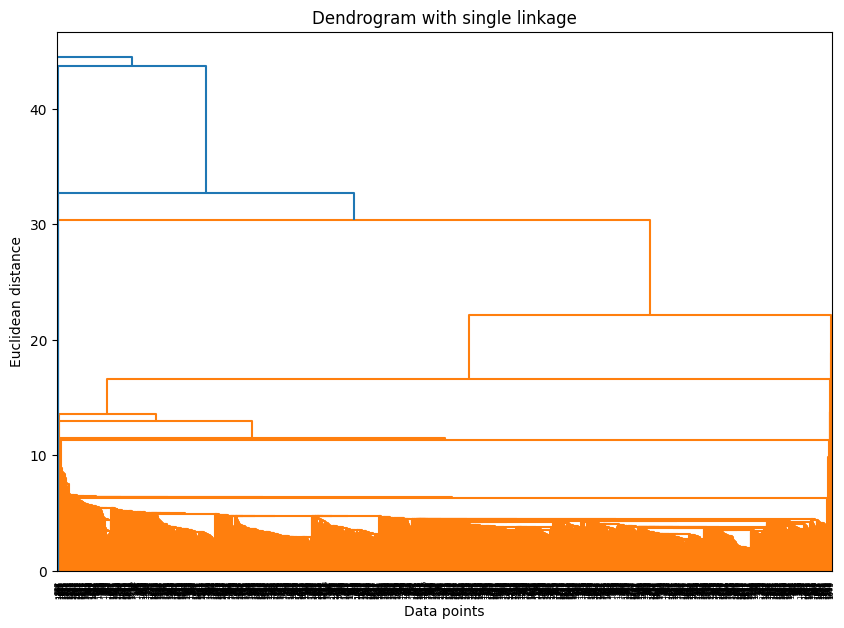

Number of clusters in Digits: 1793 (Expected 10 clusters)
Applying single linkage with threshold 2.0 on Digits data...


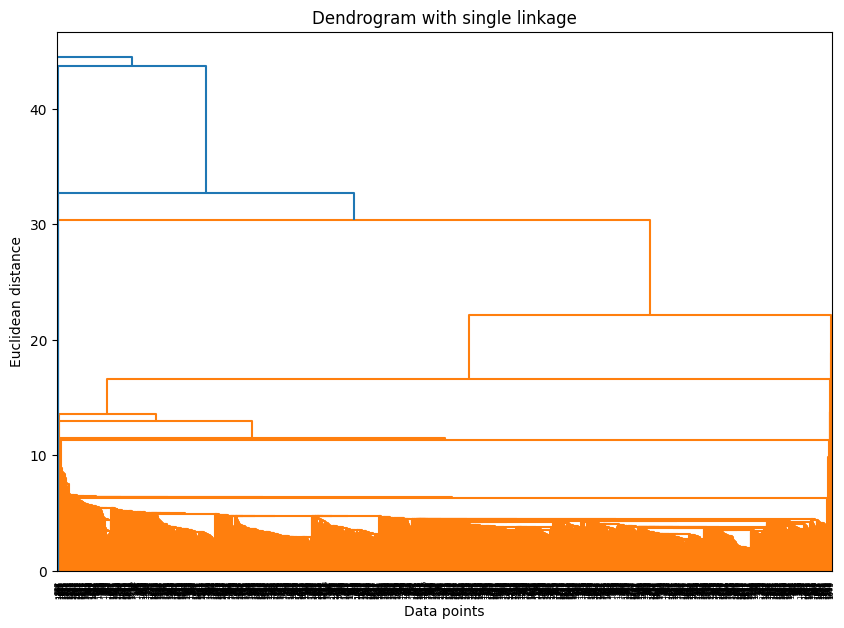

Number of clusters in Digits: 1769 (Expected 10 clusters)
Applying complete linkage with threshold 1.0 on Digits data...


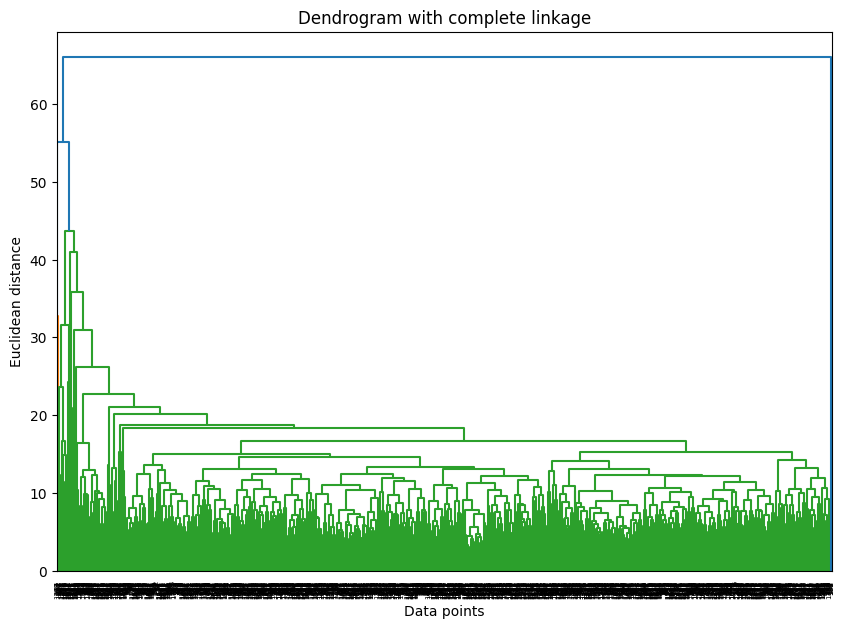

Number of clusters in Digits: 1796 (Expected 10 clusters)
Applying complete linkage with threshold 1.5 on Digits data...


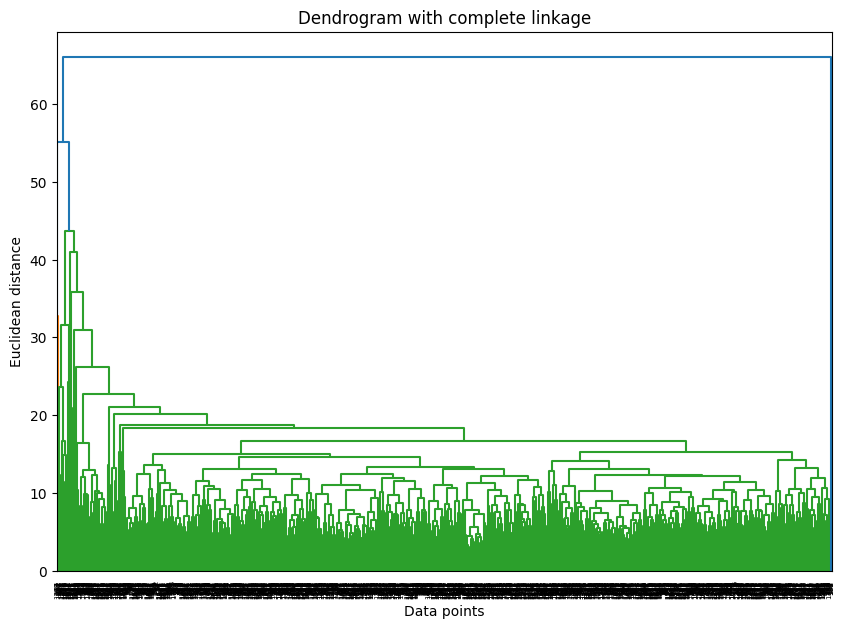

Number of clusters in Digits: 1793 (Expected 10 clusters)
Applying complete linkage with threshold 2.0 on Digits data...


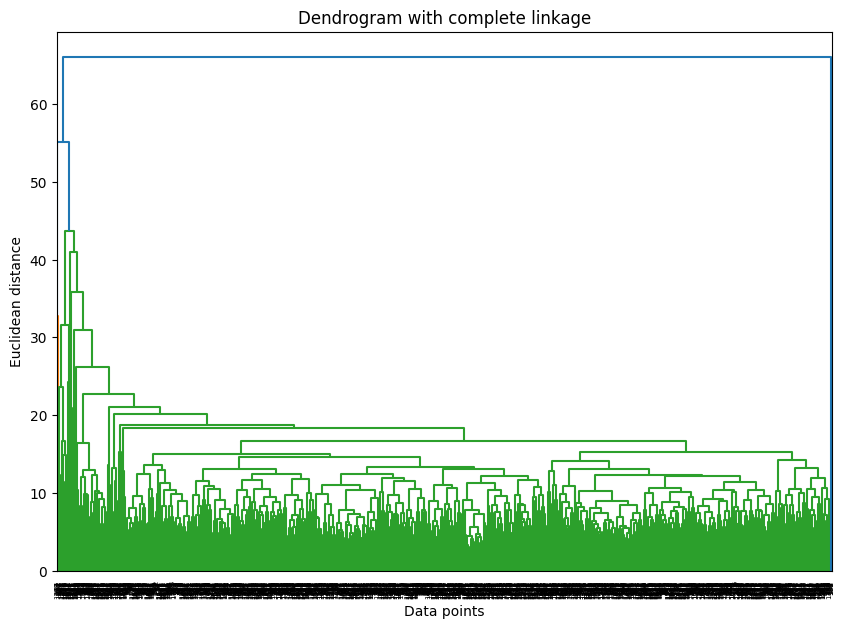

Number of clusters in Digits: 1780 (Expected 10 clusters)
Applying average linkage with threshold 1.0 on Digits data...


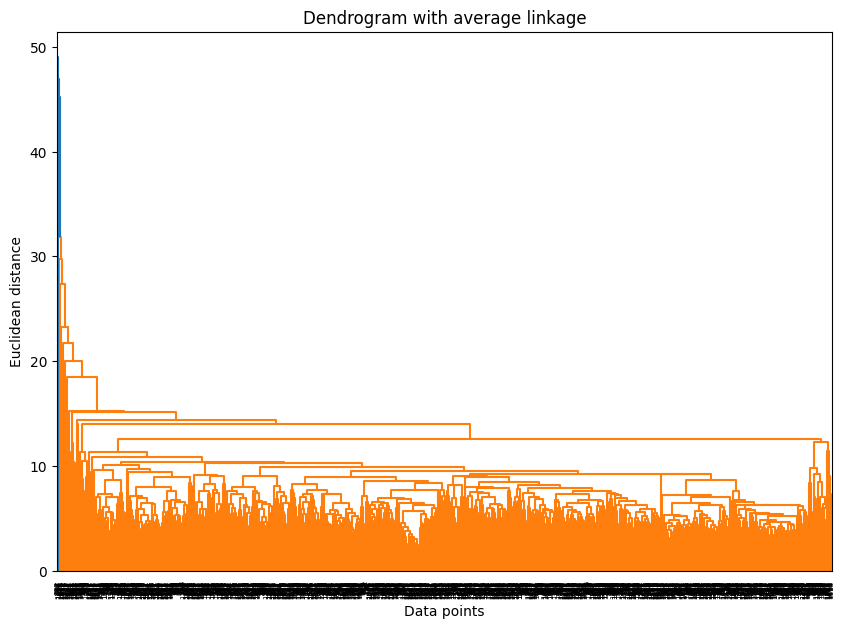

Number of clusters in Digits: 1796 (Expected 10 clusters)
Applying average linkage with threshold 1.5 on Digits data...


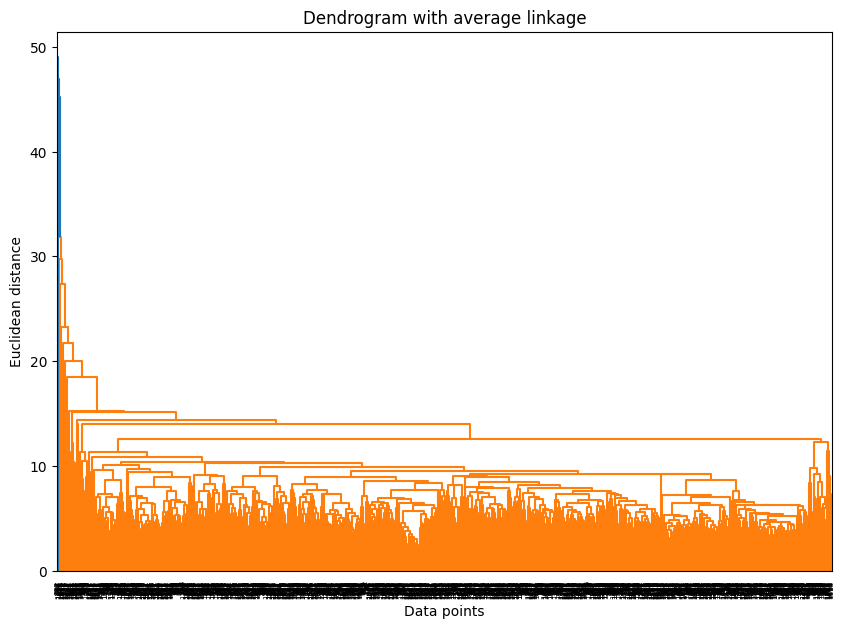

Number of clusters in Digits: 1793 (Expected 10 clusters)
Applying average linkage with threshold 2.0 on Digits data...


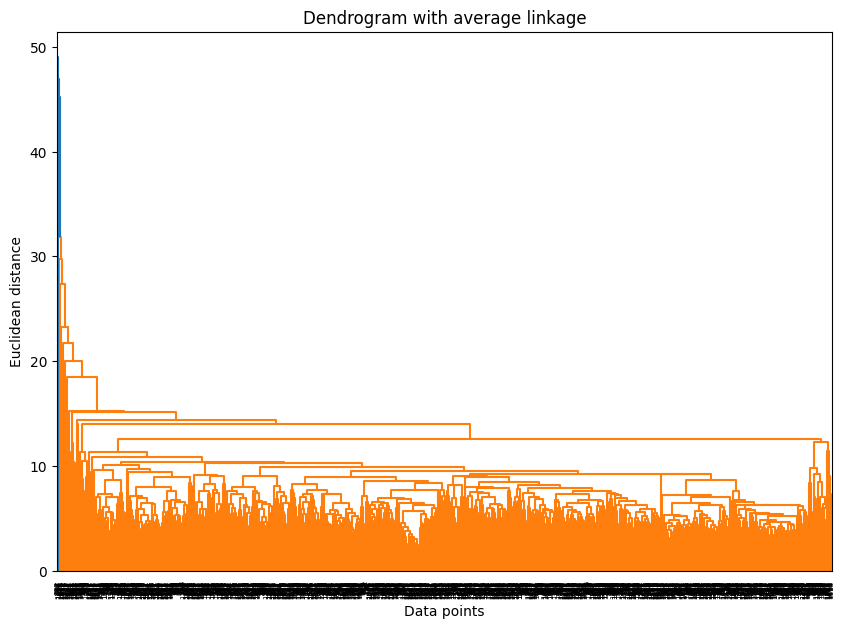

Number of clusters in Digits: 1780 (Expected 10 clusters)
Applying ward linkage with threshold 1.0 on Digits data...


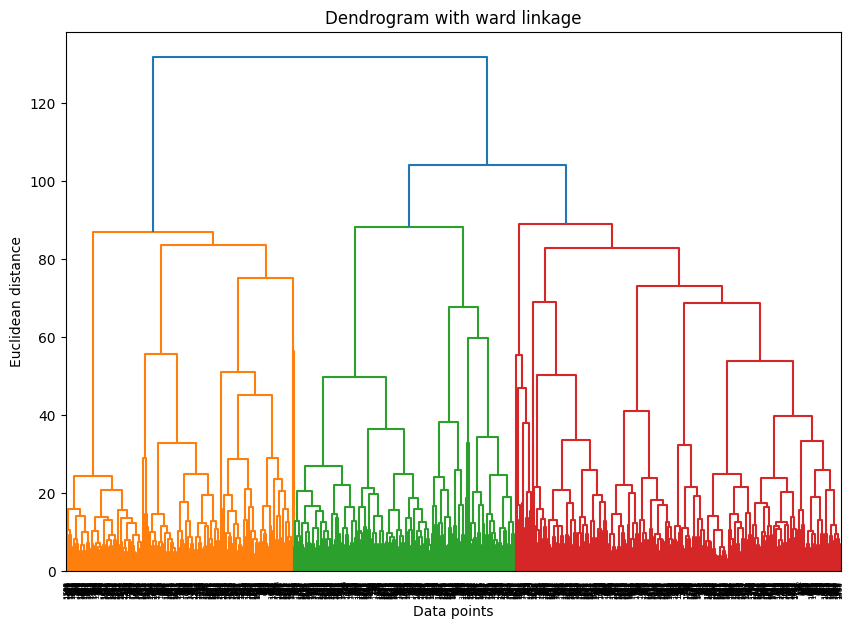

Number of clusters in Digits: 1796 (Expected 10 clusters)
Applying ward linkage with threshold 1.5 on Digits data...


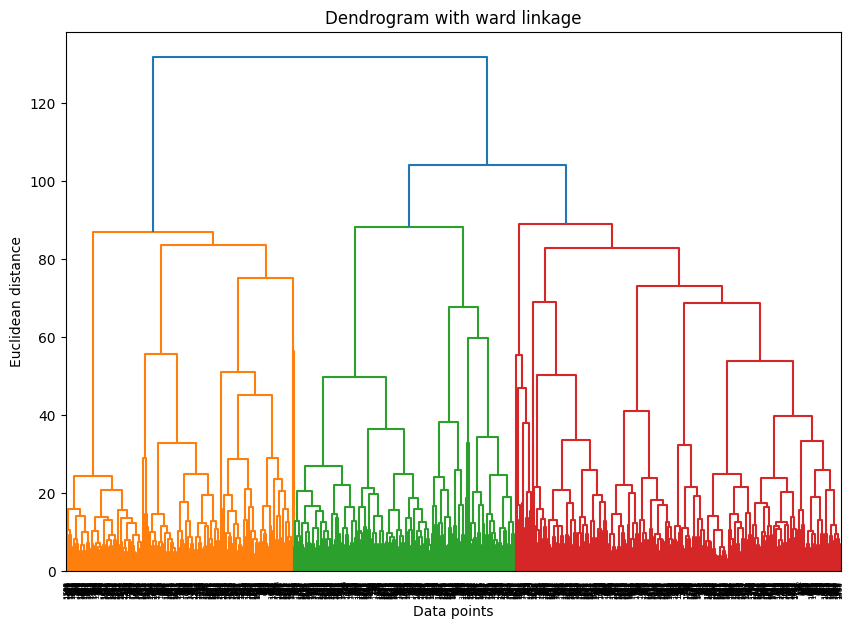

Number of clusters in Digits: 1793 (Expected 10 clusters)
Applying ward linkage with threshold 2.0 on Digits data...


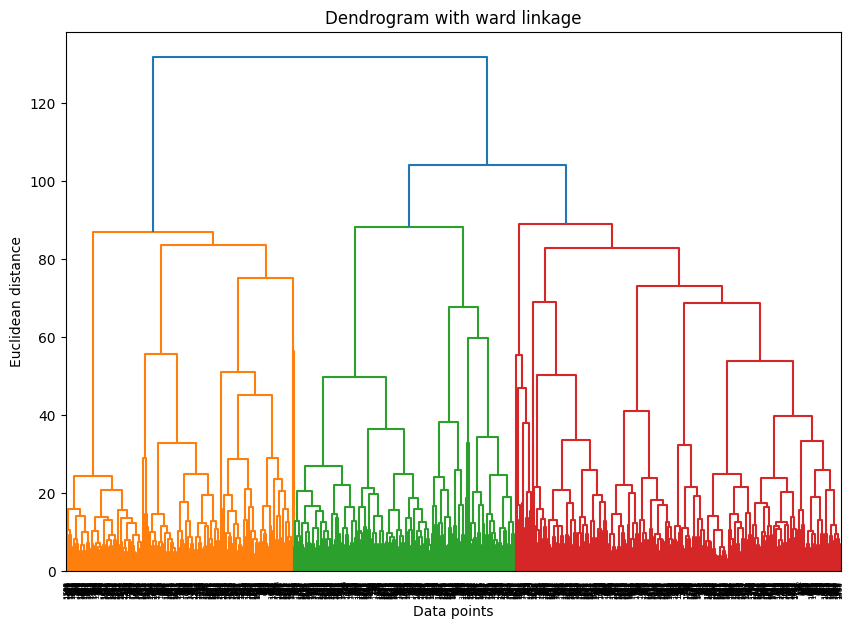

Number of clusters in Digits: 1780 (Expected 10 clusters)


In [15]:

import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.datasets import load_iris, load_digits
from sklearn.preprocessing import StandardScaler

# Load the datasets
iris = load_iris()
digits = load_digits()

# Mall data (for example purposes, we'll create a random dataset)
# You should replace this with actual Mall data if available
mall_data = np.random.rand(200, 2)  # Replace with actual Mall data

# Standardize the datasets
scaler = StandardScaler()
mall_data = scaler.fit_transform(mall_data)
iris_data = scaler.fit_transform(iris.data)
digits_data = scaler.fit_transform(digits.data)

# Function to perform hierarchical clustering and plot dendrogram
def hierarchical_clustering(data, linkage_method='ward', threshold=1.5):
    # Perform hierarchical/agglomerative clustering
    linked = linkage(data, method=linkage_method)

    # Create a dendrogram
    plt.figure(figsize=(10, 7))
    dendrogram(linked)
    plt.title(f'Dendrogram with {linkage_method} linkage')
    plt.xlabel('Data points')
    plt.ylabel('Euclidean distance')
    plt.show()

    # Define clusters by cutting the dendrogram at the threshold
    clusters = fcluster(linked, t=threshold, criterion='distance')
    return clusters

# Apply hierarchical clustering to Mall Data, Iris, and Digits with different thresholds
# Try with different linkage methods and threshold values

# Example for Mall Data
linkage_methods = ['single', 'complete', 'average', 'ward']
thresholds = [1.0, 1.5, 2.0]

for linkage_method in linkage_methods:
    for threshold in thresholds:
        print(f"Applying {linkage_method} linkage with threshold {threshold} on Mall data...")
        clusters = hierarchical_clustering(mall_data, linkage_method, threshold)

# Apply to Iris dataset
print("Applying hierarchical clustering on Iris dataset...")
for linkage_method in linkage_methods:
    for threshold in thresholds:
        print(f"Applying {linkage_method} linkage with threshold {threshold} on Iris data...")
        clusters = hierarchical_clustering(iris_data, linkage_method, threshold)
        unique_clusters = np.unique(clusters)
        print(f"Number of clusters in Iris: {len(unique_clusters)} (Expected 3 clusters)")

# Apply to Digits dataset
print("Applying hierarchical clustering on Digits dataset...")
for linkage_method in linkage_methods:
    for threshold in thresholds:
        print(f"Applying {linkage_method} linkage with threshold {threshold} on Digits data...")
        clusters = hierarchical_clustering(digits_data, linkage_method, threshold)
        unique_clusters = np.unique(clusters)
        print(f"Number of clusters in Digits: {len(unique_clusters)} (Expected 10 clusters)")

Exercise -1:
-------------
Answer:2
---------------------

Goal:

We will compare Hierarchical Clustering (with different linkages and thresholds) to K-Means Clustering on:

Mall dataset (randomly generated for illustration)

Wholesale customer dataset (you can use a real dataset here)

Iris dataset

Digits dataset


Steps:

1. Perform K-Means Clustering on the Mall and Wholesale customer datasets.


2. Perform Hierarchical Clustering (with different linkages) on the same datasets.


3. Compare the results of K-Means (the number of clusters it produces) with the results of Hierarchical Clustering for both datasets.


4. Visualize the results of both clustering methods.




---

1. K-Means Clustering

K-Means requires specifying the number of clusters (k) upfront, and we'll experiment with that for both the Mall and Wholesale customer datasets.

2. Hierarchical Clustering

We'll also apply Hierarchical Clustering using different linkage methods (single, complete, average, ward) and threshold values for the same datasets.

Code:

Mall Dataset:
K-Means with 3 clusters:
K-Means Clusters: [0 1 2]
Hierarchical clustering (Ward linkage, threshold 1.5):


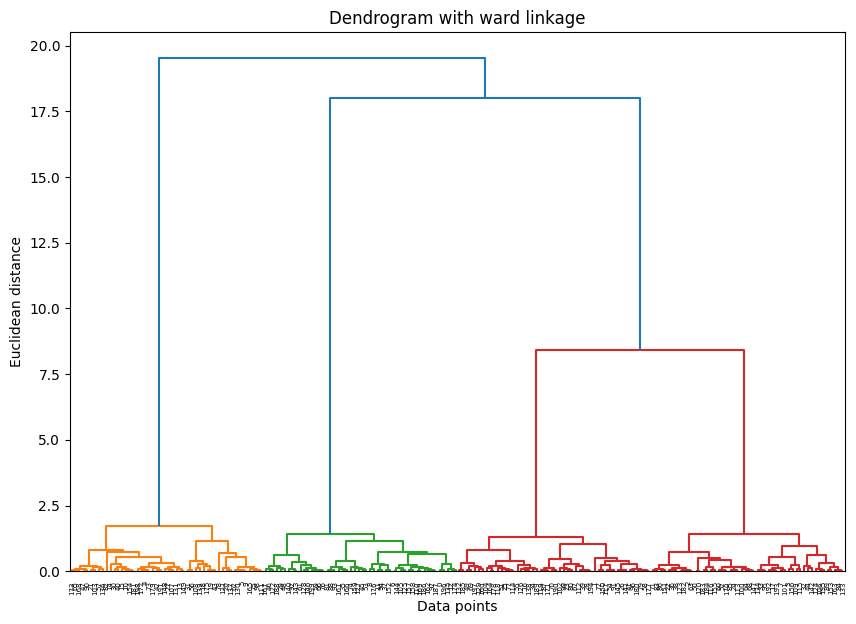

Hierarchical Clusters: [1 2 3 4 5]
K-Means with 4 clusters:
K-Means Clusters: [0 1 2 3]
Hierarchical clustering (Ward linkage, threshold 1.5):


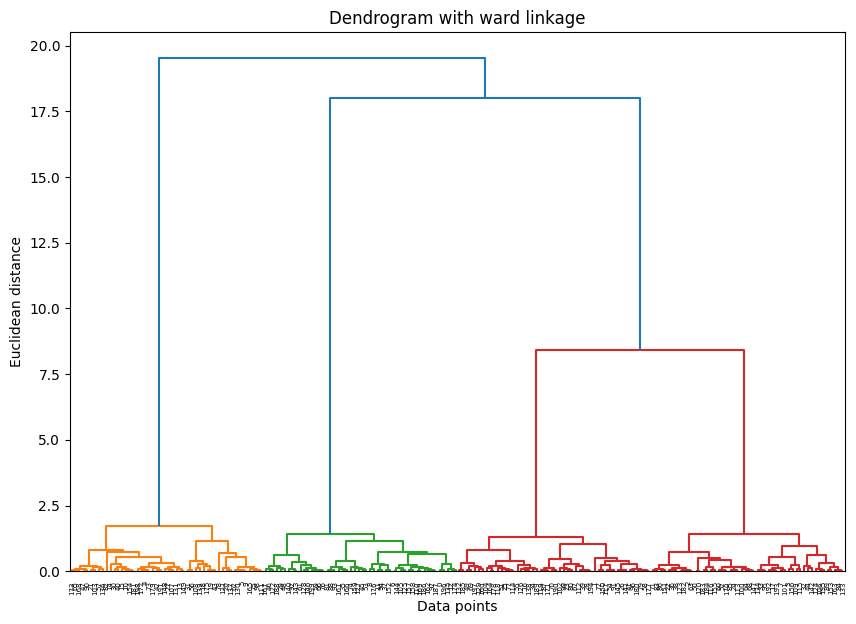

Hierarchical Clusters: [1 2 3 4 5]
K-Means with 5 clusters:
K-Means Clusters: [0 1 2 3 4]
Hierarchical clustering (Ward linkage, threshold 1.5):


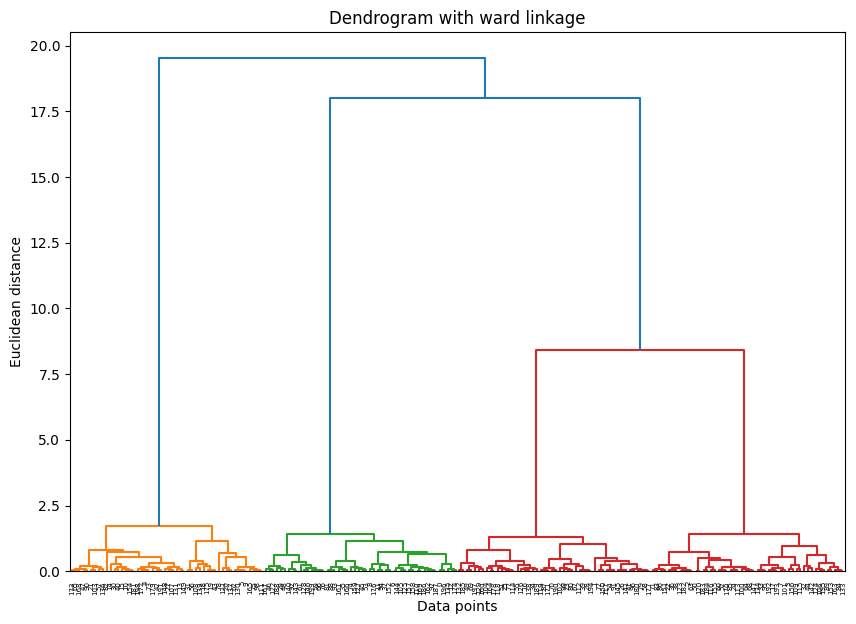

Hierarchical Clusters: [1 2 3 4 5]

Wholesale Customer Dataset:
K-Means with 3 clusters:
K-Means Clusters: [0 1 2]
Hierarchical clustering (Ward linkage, threshold 1.5):


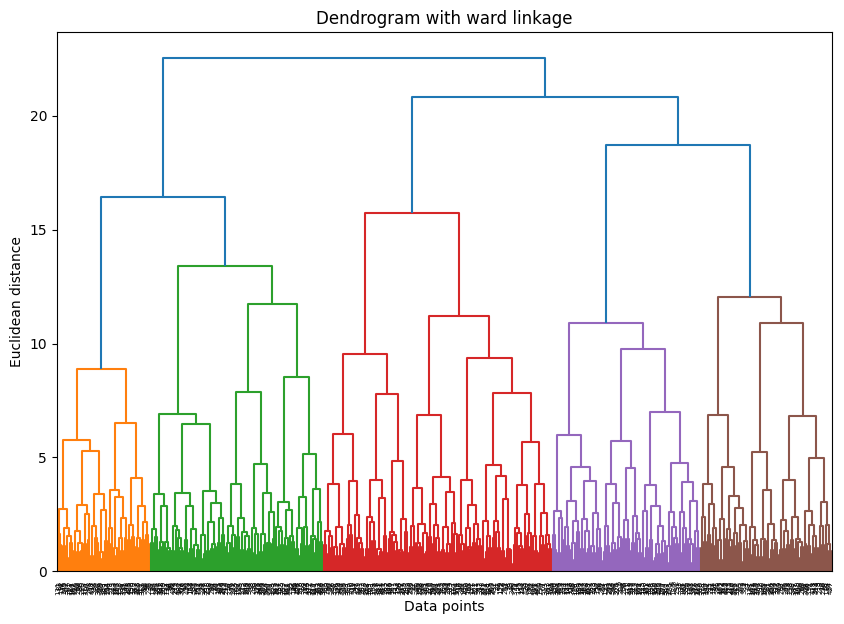

Hierarchical Clusters: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205]
K-Means with 4 clusters:
K-Means Clusters: [0 1 2 3]
Hierarchical clustering (Ward linkage, threshold 1.5):


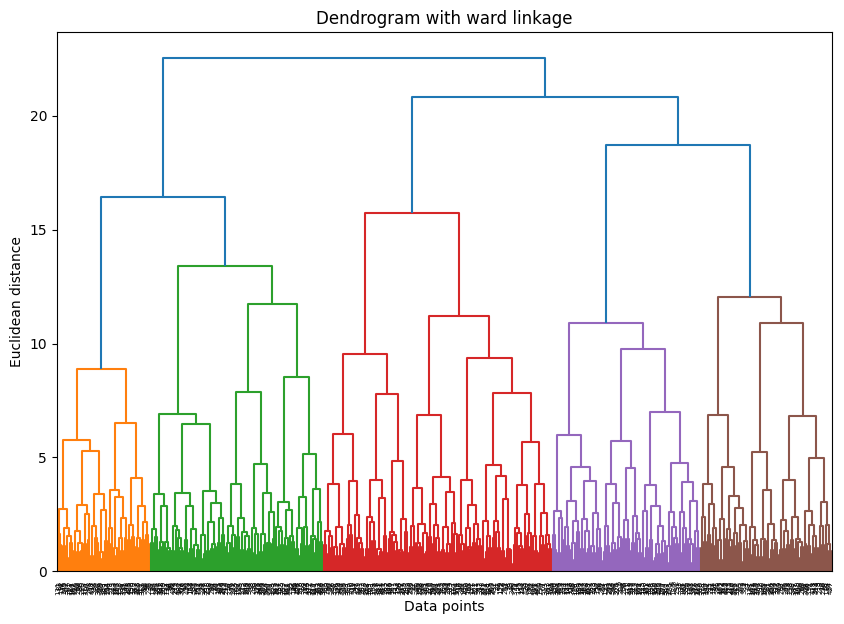

Hierarchical Clusters: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205]
K-Means with 5 clusters:
K-Means Clusters: [0 1 2 3 4]
Hierarchical clustering (Ward linkage, threshold 1.5):


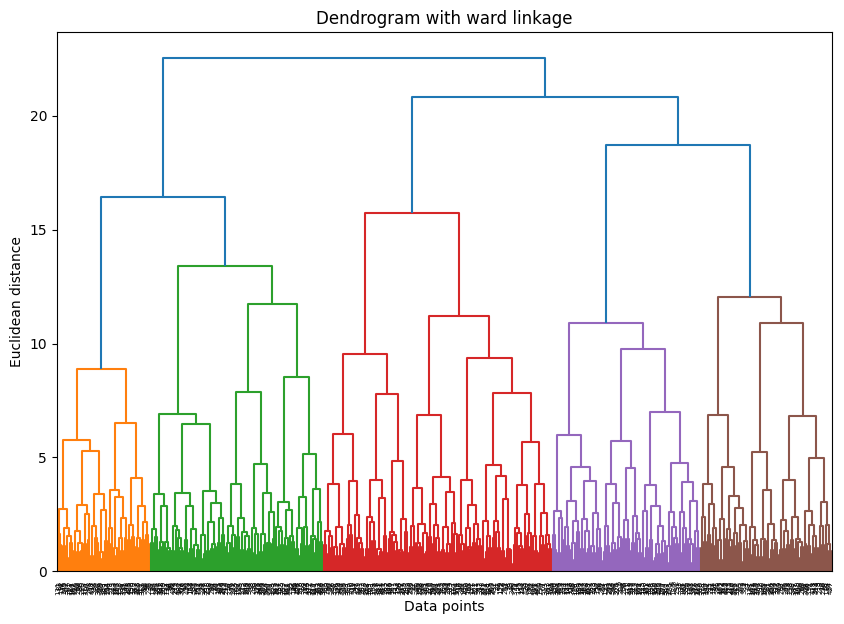

Hierarchical Clusters: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205]

Iris Dataset:
K-Means with 3 clusters:
K-Means Clusters: [0 1 2]
Hierarchical clustering (Ward linkage, threshold 1.5):


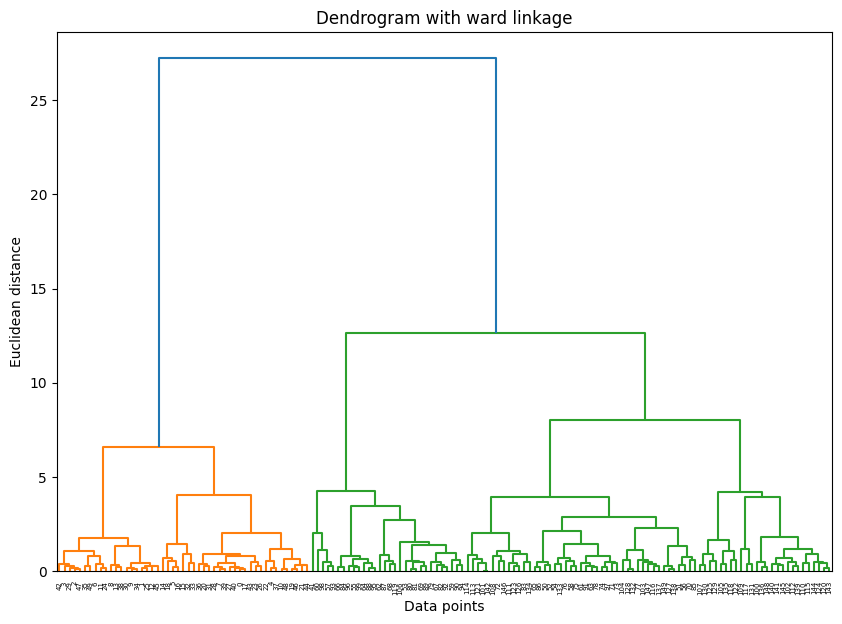

Hierarchical Clusters: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22]

Digits Dataset:
K-Means with 10 clusters:
K-Means Clusters: [0 1 2 3 4 5 6 7 8 9]
Hierarchical clustering (Ward linkage, threshold 1.5):


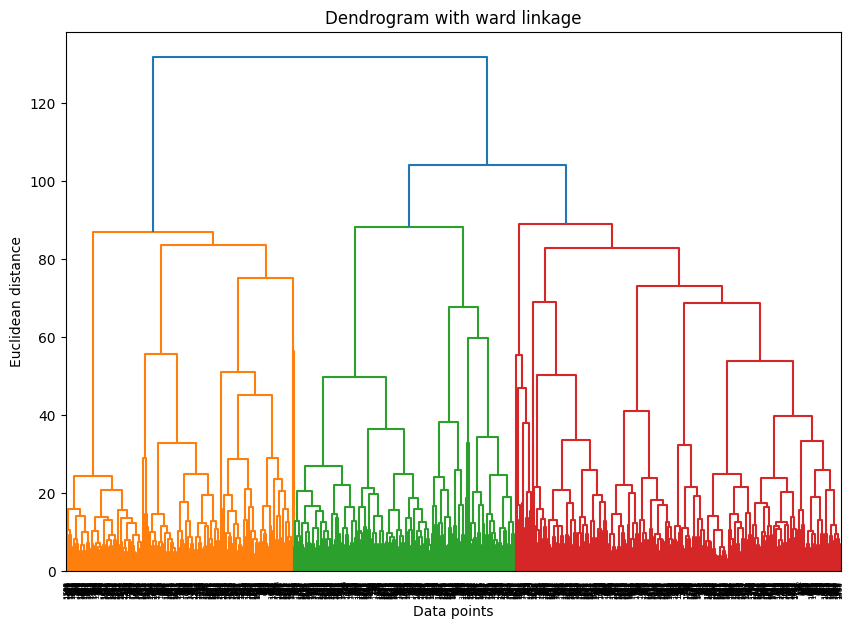

Hierarchical Clusters: [   1    2    3 ... 1791 1792 1793]


In [16]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.datasets import load_iris, load_digits
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs

# Generate Mall dataset (replace with actual data if available)
mall_data, _ = make_blobs(n_samples=200, centers=4, n_features=2, random_state=42)  # Example Mall data

# Load Wholesale customer dataset (replace with actual dataset)
# Example: Using random data for illustration; replace this with actual data
wholesale_data = np.random.rand(440, 6)  # Assuming 6 features and 440 samples in Wholesale dataset

# Standardize the datasets
scaler = StandardScaler()
mall_data = scaler.fit_transform(mall_data)
wholesale_data = scaler.fit_transform(wholesale_data)

# Load Iris and Digits datasets from sklearn
iris = load_iris()
digits = load_digits()
iris_data = scaler.fit_transform(iris.data)
digits_data = scaler.fit_transform(digits.data)

# Function for hierarchical clustering
def hierarchical_clustering(data, linkage_method='ward', threshold=1.5):
    # Perform hierarchical/agglomerative clustering
    linked = linkage(data, method=linkage_method)

    # Create a dendrogram
    plt.figure(figsize=(10, 7))
    dendrogram(linked)
    plt.title(f'Dendrogram with {linkage_method} linkage')
    plt.xlabel('Data points')
    plt.ylabel('Euclidean distance')
    plt.show()

    # Define clusters by cutting the dendrogram at the threshold
    clusters = fcluster(linked, t=threshold, criterion='distance')
    return clusters

# Function for K-Means clustering
def kmeans_clustering(data, n_clusters):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    clusters = kmeans.fit_predict(data)
    return clusters

# Compare K-Means and Hierarchical clustering for Mall dataset
print("Mall Dataset:")
for n_clusters in [3, 4, 5]:  # Trying different cluster numbers for K-Means
    print(f"K-Means with {n_clusters} clusters:")
    kmeans_clusters = kmeans_clustering(mall_data, n_clusters)
    print(f"K-Means Clusters: {np.unique(kmeans_clusters)}")

    print(f"Hierarchical clustering (Ward linkage, threshold 1.5):")
    hierarchical_clusters = hierarchical_clustering(mall_data, linkage_method='ward', threshold=1.5)
    print(f"Hierarchical Clusters: {np.unique(hierarchical_clusters)}")

# Compare K-Means and Hierarchical clustering for Wholesale customer dataset
print("\nWholesale Customer Dataset:")
for n_clusters in [3, 4, 5]:  # Trying different cluster numbers for K-Means
    print(f"K-Means with {n_clusters} clusters:")
    kmeans_clusters = kmeans_clustering(wholesale_data, n_clusters)
    print(f"K-Means Clusters: {np.unique(kmeans_clusters)}")

    print(f"Hierarchical clustering (Ward linkage, threshold 1.5):")
    hierarchical_clusters = hierarchical_clustering(wholesale_data, linkage_method='ward', threshold=1.5)
    print(f"Hierarchical Clusters: {np.unique(hierarchical_clusters)}")

# Compare K-Means and Hierarchical clustering for Iris dataset (expected 3 clusters)
print("\nIris Dataset:")
for n_clusters in [3]:  # Iris dataset has 3 classes
    print(f"K-Means with {n_clusters} clusters:")
    kmeans_clusters = kmeans_clustering(iris_data, n_clusters)
    print(f"K-Means Clusters: {np.unique(kmeans_clusters)}")

    print(f"Hierarchical clustering (Ward linkage, threshold 1.5):")
    hierarchical_clusters = hierarchical_clustering(iris_data, linkage_method='ward', threshold=1.5)
    print(f"Hierarchical Clusters: {np.unique(hierarchical_clusters)}")

# Compare K-Means and Hierarchical clustering for Digits dataset (expected 10 clusters)
print("\nDigits Dataset:")
for n_clusters in [10]:  # Digits dataset has 10 classes
    print(f"K-Means with {n_clusters} clusters:")
    kmeans_clusters = kmeans_clustering(digits_data, n_clusters)
    print(f"K-Means Clusters: {np.unique(kmeans_clusters)}")

    print(f"Hierarchical clustering (Ward linkage, threshold 1.5):")
    hierarchical_clusters = hierarchical_clustering(digits_data, linkage_method='ward', threshold=1.5)
    print(f"Hierarchical Clusters: {np.unique(hierarchical_clusters)}")